*PROYECTO INTEGRADOR DEL MODULO 4*

               BIOGENESYS           

PRIMER AVANCE:

In [3]:
#Instalar librerias faltantes 
! pip install matplotlib
! pip install seaborn 

In [4]:
#Importar librerias 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [5]:
data = pd.read_csv("data_latinoamerica.csv", sep=',') #lectura y asignacion a data el archivo 

In [6]:
data.head() #lectura de las cinco primeras columnas 

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [7]:
np.shape(data) #datos que deberia tener 

(12216057, 50)

In [8]:
data.shape #datos obtenidos 

(12216057, 50)

In [9]:
#nombre de cada pais y su frecuencia
data['country_code'] 
data.country_name.value_counts() 


country_name
Brazil                5565456
Mexico                2475518
Peru                  1883891
Colombia              1145596
Argentina              540095
Chile                  359733
Dominican Republic      32703
Venezuela               24775
Ecuador                 24775
Guatemala               22793
Uruguay                 19820
Honduras                18829
Paraguay                18829
Nicaragua               17838
Cuba                    17838
El Salvador             14865
Panama                  13874
Bolivia                  9910
Costa Rica               7928
Puerto Rico               991
Name: count, dtype: int64

In [10]:
#seleccionamos los paises para la expansion 
paises_seleccionados=['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']
mask = data['country_name'].isin(paises_seleccionados) #solo almacena los true
data1 = data[mask] 

In [11]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']
data_latinoamerica=data[data['country_name'].isin(paises_seleccionados)]

In [12]:
np.shape(data_latinoamerica) #visualizamos la cantidad de datos filtrados 

(11970289, 50)

In [13]:
#detectar los nulos
print(data_latinoamerica.isnull().sum()) 

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


In [14]:
data_latinoamerica.location_key.value_counts() #cuenta cuántas veces aparece cada valor único en esa columna.

location_key
PE_UCA_0401    991
AR             991
AR_A           991
AR_A_007       991
AR_A_014       991
              ... 
AR_A_147       991
AR_A_140       991
AR_A_133       991
AR_A_126       991
AR_A_119       991
Name: count, Length: 12079, dtype: int64

In [15]:
#aplico filtro para los paises seleccionados 
data_latinoamerica_paises=data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]
data_latinoamerica_paises.shape 

(5946, 50)

In [16]:
#filtramos por una fecha donde se empezaron los registros
data_latinoamerica_paises_fecha = data_latinoamerica_paises[data_latinoamerica_paises['date'] > '2021-01-01']

In [17]:
data_latinoamerica_paises_fecha.location_key.value_counts() #verifico los datos

location_key
AR    624
BR    624
CL    624
CO    624
MX    624
PE    624
Name: count, dtype: int64

In [18]:
data_latinoamerica_paises_fecha.shape #verifico el tamaño 

(3744, 50)

In [19]:
#cantidad de nulos que hay en las fechas
valores_nulos_fecha = data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0]
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [20]:
data_latinoamerica_paises_fecha.new_confirmed.mean() #promedio de nulos en nuevos casos confirmados 

np.float64(13936.279613215149)

In [21]:
#para el tratamiento de nulos, completaremos esos valores con la media(promedio) de cada pais
for pais in paises_seleccionados:

    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais, 'new_confirmed']=data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'new_confirmed'].fillna(round(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'new_confirmed'].mean())) #redondea el resultado a entero
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais, 'new_deceased']=data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'new_deceased'].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'new_deceased'].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais, 'cumulative_confirmed']=data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'cumulative_confirmed'].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'cumulative_confirmed'].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais, 'cumulative_deceased']=data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'cumulative_deceased'].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'cumulative_deceased'].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais, 'rainfall_mm']=data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'rainfall_mm'].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'rainfall_mm'].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais, 'relative_humidity']=data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'relative_humidity'].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'relative_humidity'].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais, 'average_temperature_celsius']=data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'average_temperature_celsius'].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'average_temperature_celsius'].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais, 'minimum_temperature_celsius']=data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'minimum_temperature_celsius'].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais, 'maximum_temperature_celsius']=data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'maximum_temperature_celsius'].fillna(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name']==pais,'maximum_temperature_celsius'].mean())

    #rellenado de Nan con el valor cero en las siguientes columnas:
    data_latinoamerica_paises_fecha.loc[:,'new_recovered']=data_latinoamerica_paises_fecha['new_recovered'].fillna(0)
    data_latinoamerica_paises_fecha.loc[:, 'cumulative_recovered']=data_latinoamerica_paises_fecha['cumulative_recovered'].fillna(0)
    data_latinoamerica_paises_fecha.loc[:, 'cumulative_vaccine_doses_administered']=data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'].fillna(0)
    
    

In [22]:
#verificacion de nulos:

print(data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_fecha))

Series([], dtype: int64)
(3744, 50)


Guardamos el dataset filtrado por fecha en un archivo csv, para su posterior uso en los siguientes analisis y que no sea necesario cargar el archivo original.

In [23]:
data_latinoamerica_paises_fecha.to_csv("DatosFinalesFiltrados.csv",index=False)

Para liberar memoria reiniciar el notebook y cargar el archivo filtrado para continuar con el analisis.

In [34]:
data_latinoamerica_paises=pd.read_csv("DatosFinalesFiltrados.csv",sep=',')

In [29]:
#visualizamos los datos del dataset filtrado y sus descripciones (usando el ciclo for)
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('--------------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
--------------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
--------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
--------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
--------------------------------------
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
--------------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26

In [30]:
#visualizacion de los datos y sus descripciones(usando ciclo while)
i=0
while i<len(data_latinoamerica_paises.columns):
    print(data_latinoamerica_paises.columns[i])
    print(data_latinoamerica_paises[data_latinoamerica_paises.columns[i]].describe())
    print('----------------------------------------------------')
    i+=1


location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
----------------------------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
----------------------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
----------------------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
----------------------------------------------------
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
----------------------------------------------------
new_deceased
count     3744.000000
mean      

Estas metricas ayudan en el analisis de datos a que tengan veracidad los datos filtrados, lo que muestra asu vez que estan mas completos y se pueden entender mejor.

No se muestran todas las estadisticas, pero si las principales.

Debido a que no se visualizan la varianza, promedios o rangos, lo cual ayudaria mas a la descripcion de los datos.

In [39]:
#Funcion que solo muestra los valores numericos y no los valores categoricos y mostrar la media,mediana y la varianza
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype== 'float64' or data[i].dtype== 'int64':
            print(i)
            print('mediana:',data[i].median())
            print('varianza:',data[i].var())
            print('rango:',data[i].max()-data[i].min())
            print("moda",data[i].mode()[0])
            print('---------------------------------------------')

describir_datos(data_latinoamerica_paises)


new_confirmed
mediana: 5214.0
varianza: 586577491.1622744
rango: 298981.0
moda 0.0
---------------------------------------------
new_deceased
mediana: 100.5
varianza: 257292.4462981465
rango: 11447.0
moda 0.0
---------------------------------------------
cumulative_confirmed
mediana: 3632143.5
varianza: 63828420109841.22
rango: 34567862.0
moda 6093645.0
---------------------------------------------
cumulative_deceased
mediana: 139614.0
varianza: 33415397832.126804
rango: 685202.0
moda 128994.0
---------------------------------------------
cumulative_vaccine_doses_administered
mediana: 32445756.5
varianza: 8551958275078892.0
rango: 347868481.0
moda 0.0
---------------------------------------------
population
mediana: 47910798.0
varianza: 4507478439615793.0
rango: 194985406.0
moda 17574003.0
---------------------------------------------
population_male
mediana: 22254165.0
varianza: 1101239940970119.2
rango: 95463769.0
moda 8972014.0
---------------------------------------------
populatio

La mediana es una medida estadística que representa el valor central de un conjunto de datos, en nuestro caso es el dataset filtrado. Es decir que la mediana es el valor que divide un conjunto de datos ordenados en dos partes iguales.


La varianza mide cuánto se dispersan los valores de un conjunto de datos respecto a su media. En cambio el rango es la diferencia entre el valor máximo y el valor mínimo de un conjunto de datos.
La varianza proporciona una medida más detallada de la dispersión, ya que toma en cuenta todas las diferencias respecto a la media, mientras que el rango solo considera los valores extremos.


Consistencia: Si la mediana está cerca de los valores y la varianza y el rango son bajos, los datos son más consistentes y homogéneos.
Variabilidad: Si la mediana está lejos de la mayoría de los datos, y la varianza y el rango son altos, esto indica una mayor variabilidad, lo que puede reflejar diferencias significativas dentro del conjunto de datos.

WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWW
WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWW

SEGUNDO AVANCE

In [77]:
#Importar librerias 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [78]:
data_latinoamerica_paises=pd.read_csv("DatosFinalesFiltrados.csv",sep=',') #lectura de los datos 

In [79]:
data_latinoamerica_paises.describe() #descripcion del archivo

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13921.908120    276.887411          6.777074e+06        192957.902075   
std     24219.361907    507.240028          7.989269e+06        182798.790565   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59255.750000   
50%      5214.000000    100.500000          3.632144e+06        139614.000000   
75%     14834.000000    312.000000          6.223497e+06        214939.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            6.544474e+07  7.772147e+07     3.787035e+07   
std                             9.247680e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             2.618297e+06  2.938188e+07     1.445076e+07   
50%                             3.244576e+07  4.791080e+07     2.225416e+07   
75%                             7.478108e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          3.894398e+06  
std                      1.665972   23

In [80]:
data_latinoamerica_paises.head(3) #mostrar solo las primeras 3 filas

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  

[3 rows x 50 columns]

In [81]:
data_latinoamerica_paises.info() #la informacion mas relevante 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [82]:
#Estadisticas basicas de los datos
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('-------------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-------------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-------------------------------------
new_confirmed
count      3744.000000
mean      13921.908120
std       24219.361907
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.0000

In [83]:
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil'] #creacion de la variable con los paises seleccionados 

In [84]:
print(data_latinoamerica_paises.columns)

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

In [85]:
#ponemos como indice la columna'date' para poder hacer analisis a traves del tiempo 
data_latinoamerica_paises['date']=pd.to_datetime(data_latinoamerica_paises['date']) #coversion a formato tipo fecha
data_latinoamerica_paises.set_index('date',inplace=True) 

In [86]:
data_latinoamerica_paises.index #verifico las columnas 

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11',
               ...
               '2022-09-08', '2022-09-09', '2022-09-10', '2022-09-11',
               '2022-09-12', '2022-09-13', '2022-09-14', '2022-09-15',
               '2022-09-16', '2022-09-17'],
              dtype='datetime64[ns]', name='date', length=3744, freq=None)

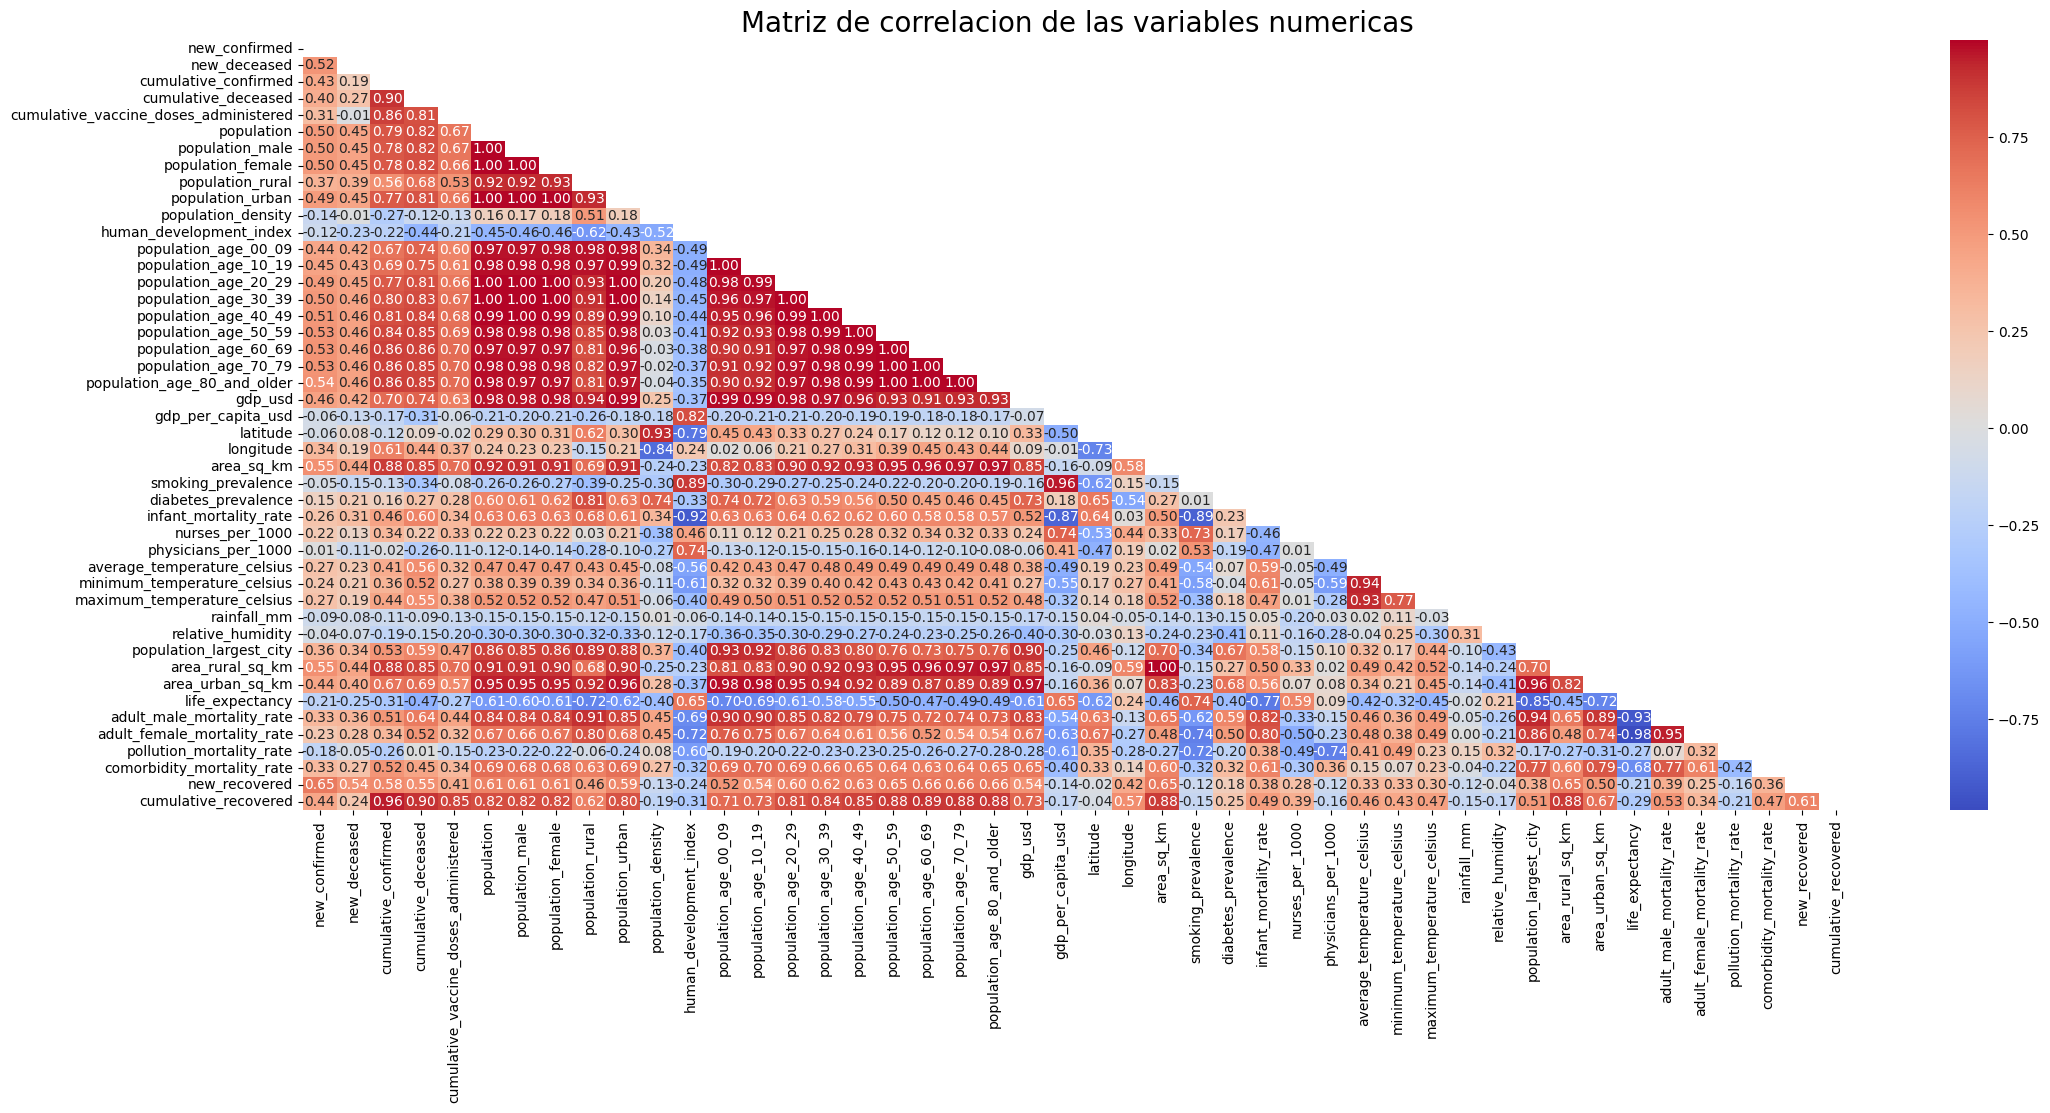

In [87]:
#se crea la matriz de correlacion de las variables numericas
numeric_columns=data_latinoamerica_paises.select_dtypes(include=['float64','int64']).columns
correlation_matrix=data_latinoamerica_paises[numeric_columns].corr()

#se crea una mascara para el triangulo superior
mask= np.triu(np.ones_like(correlation_matrix,dtype=bool))

#mostramos valores superiores a 0.5 es decir donde hay una correlacion fuerte
correlacion_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

#se crea la grafica
plt.figure(figsize=(25,10))
sns.heatmap(correlation_matrix,mask=mask,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Matriz de correlacion de las variables numericas',fontsize=20)
plt.show()

En la grafica anterior se presentan las variables con mayor correlacion, para identificarlas rapidamente, ademas se definio un umbral cuyo valorabsoluto sea mayor a 0.5 y se graficaron en un heatmap. Es decir, cada celda de esta matriz representa el coeficiente de correlación entre dos variables específicas.

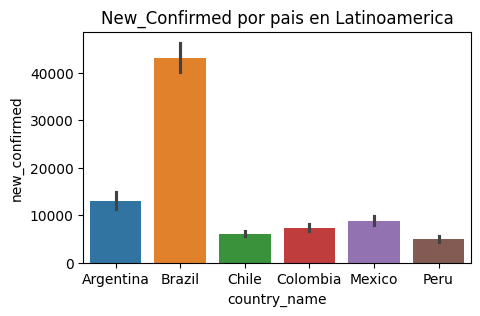

In [88]:
#Grafica de barras
fig, ax=plt.subplots(figsize=(5,3))
sns.barplot(x='country_name', y='new_confirmed', data=data_latinoamerica_paises, ax=ax,hue='country_name')
plt.title('New_Confirmed por pais en Latinoamerica')
plt.show()

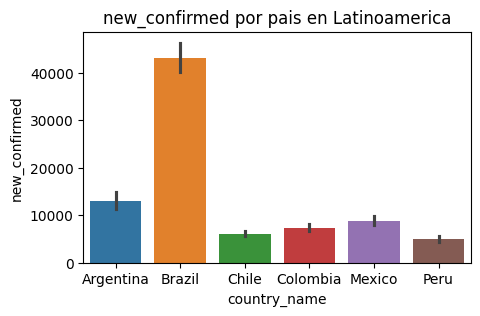

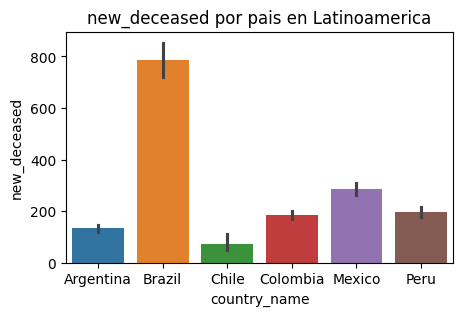

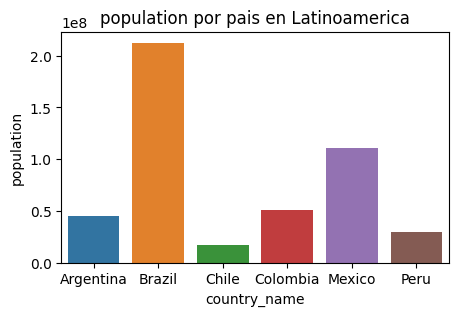

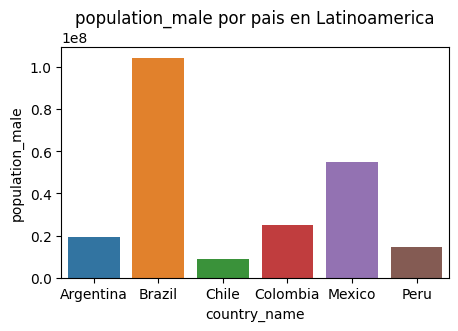

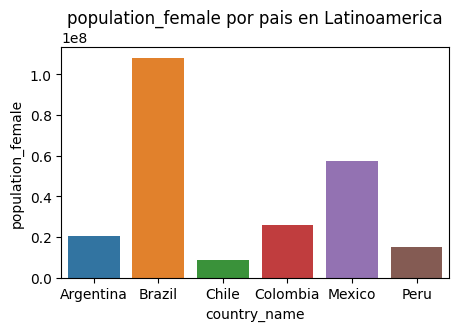

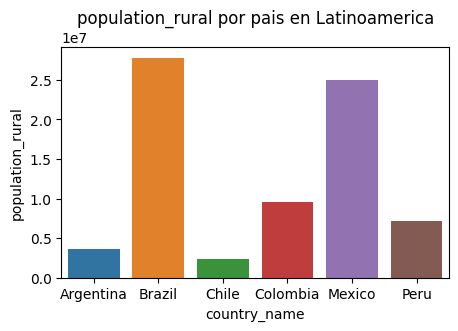

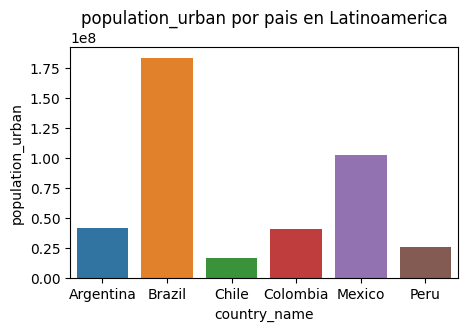

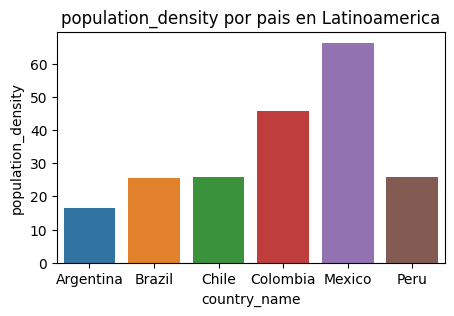

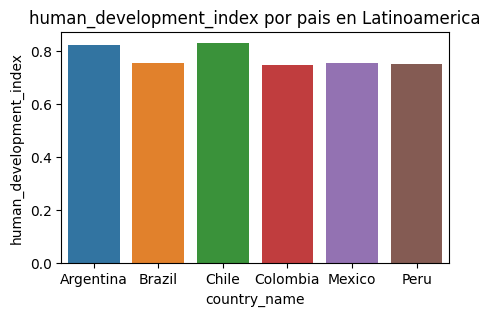

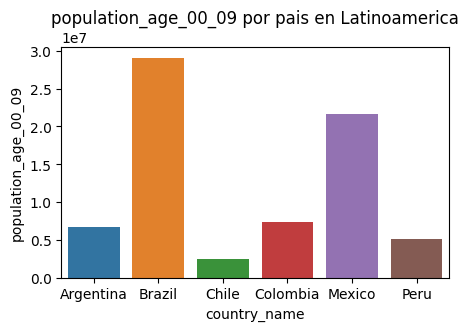

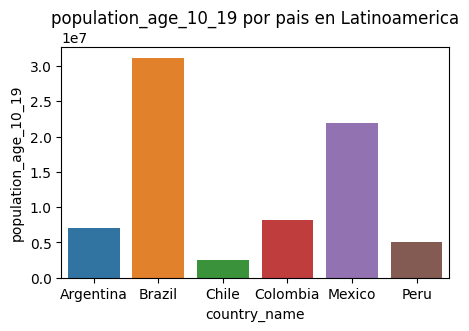

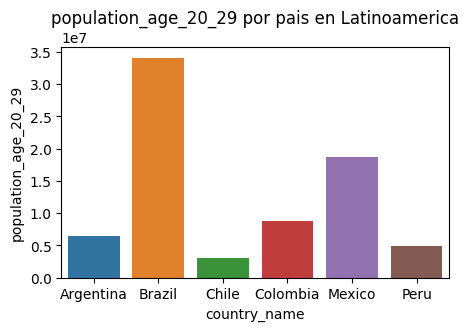

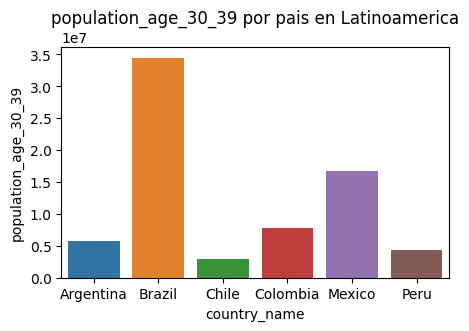

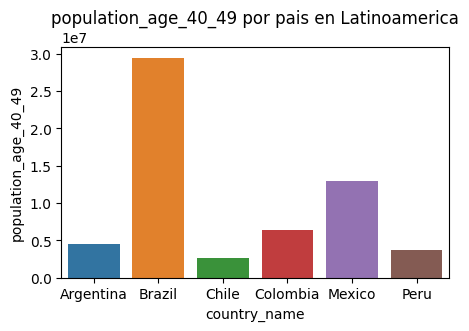

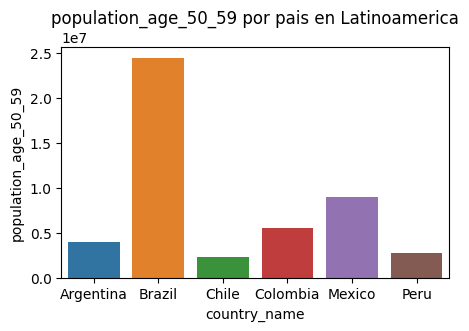

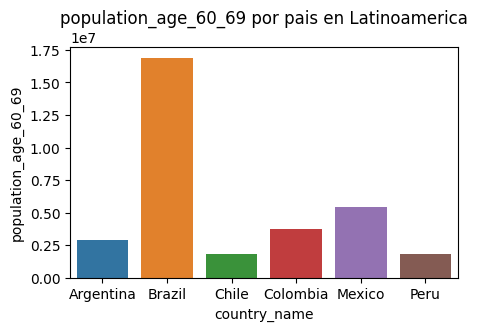

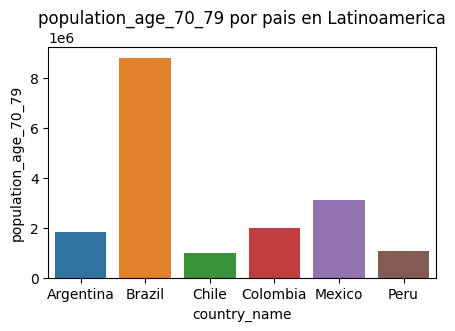

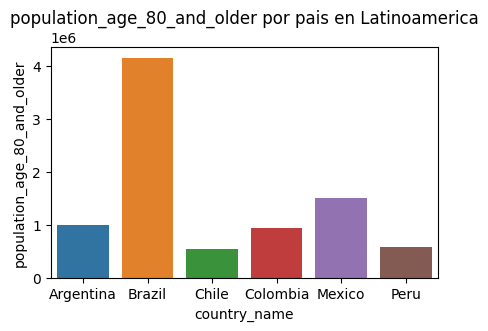

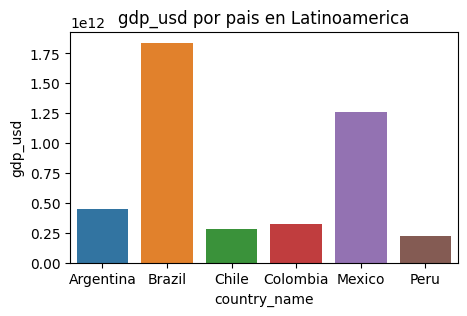

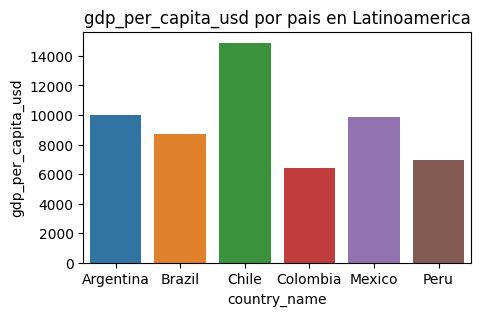

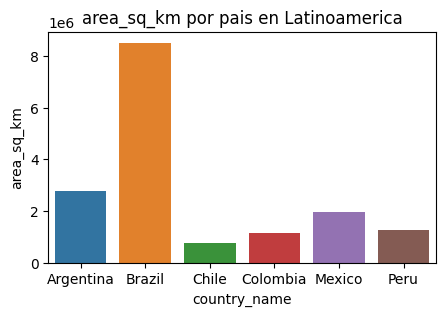

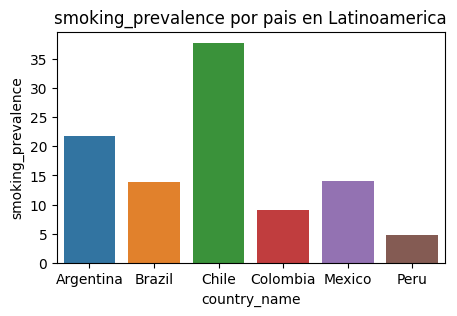

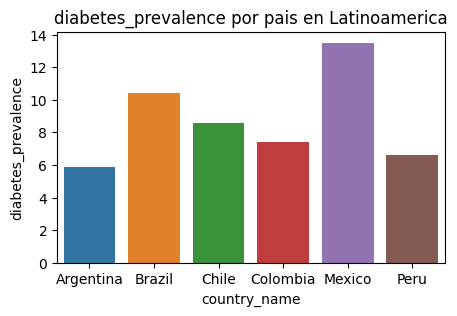

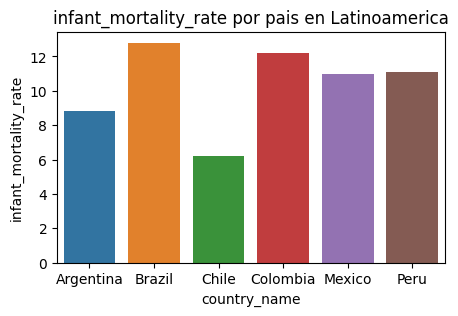

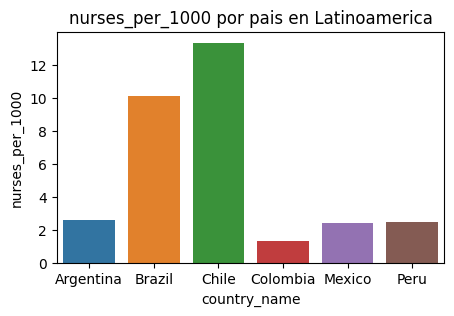

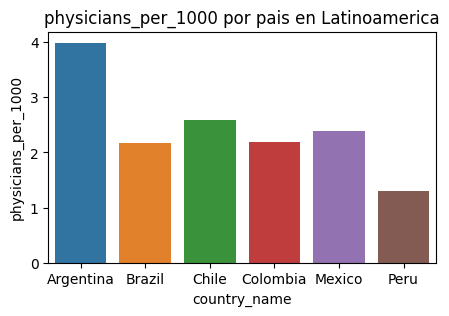

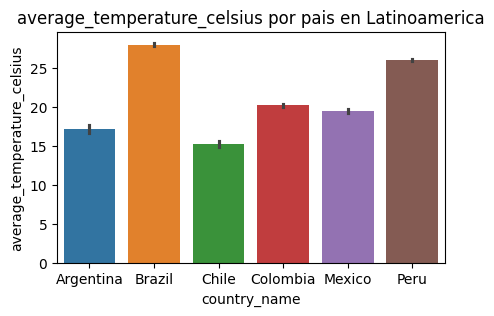

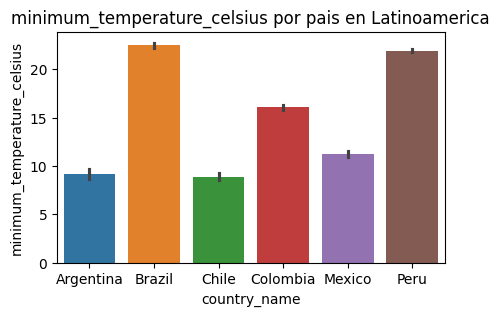

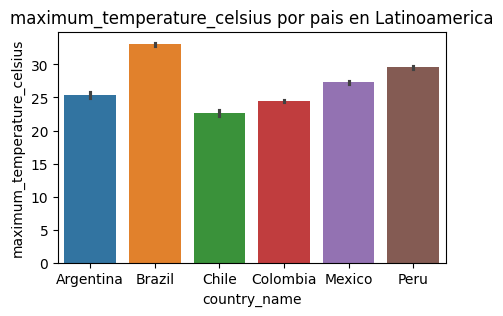

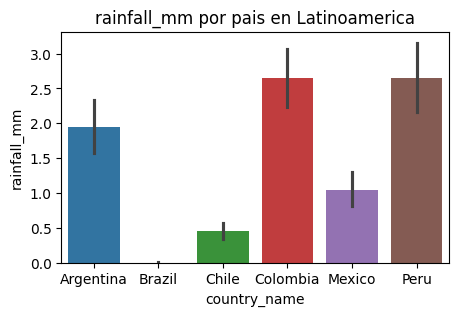

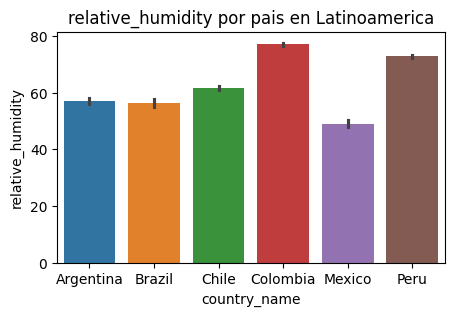

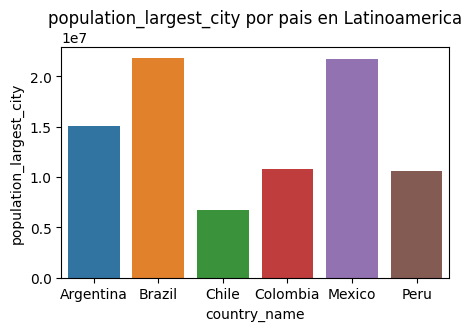

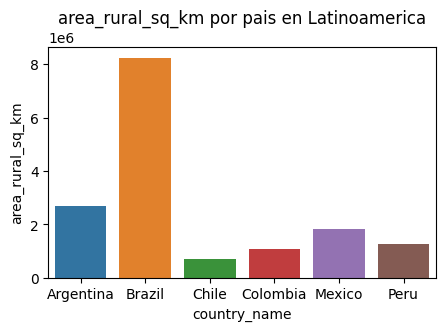

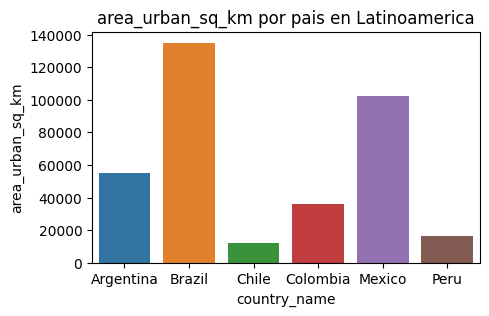

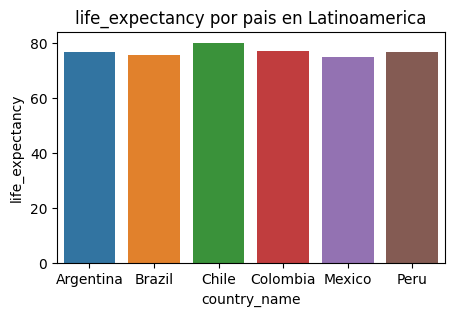

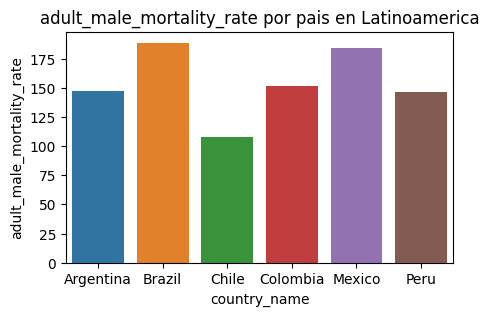

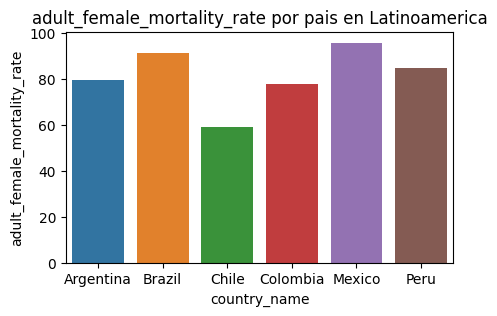

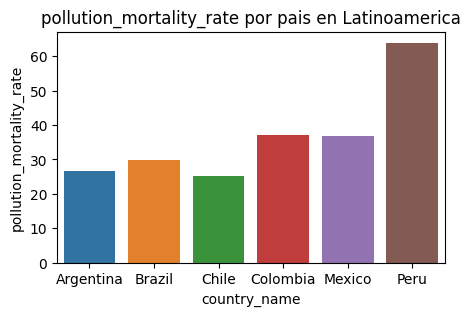

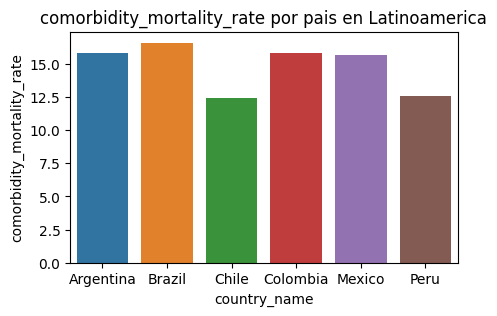

In [89]:
#diagrama de barras para cada pais en data_latinoamerica_paises con seis columnas
for i in data_latinoamerica_paises.columns:
    if i not in['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed','cumulative_deceased','cumulative_recovered','cumulative_vaccine_doses_administered','new_recovered']:
       fig,ax=plt.subplots(figsize=(5,3))
       sns.barplot(x='country_name',y=i,data=data_latinoamerica_paises, ax=ax,hue='country_name')
       plt.title(f'{i} por pais en Latinoamerica')
       plt.show()
 

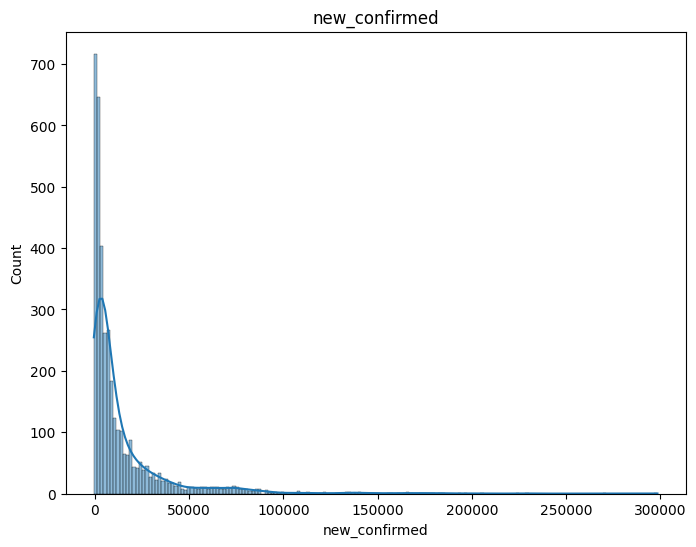

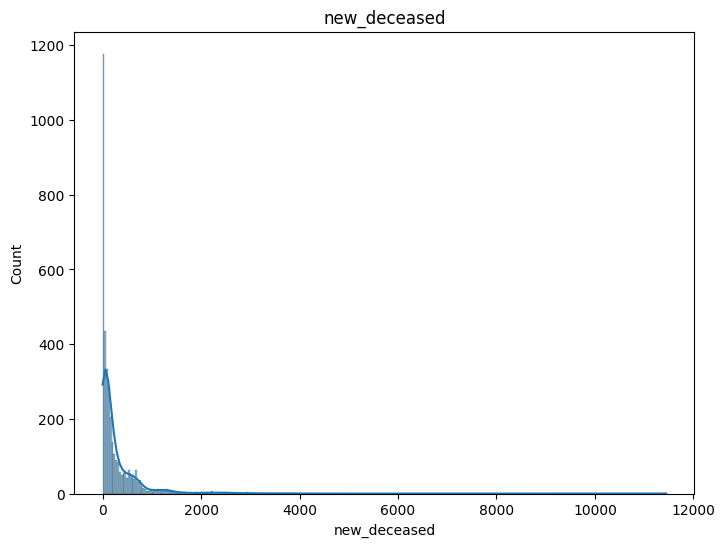

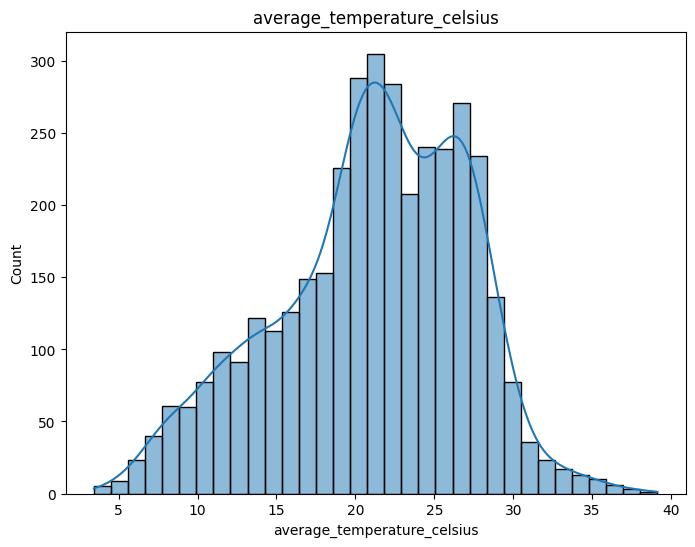

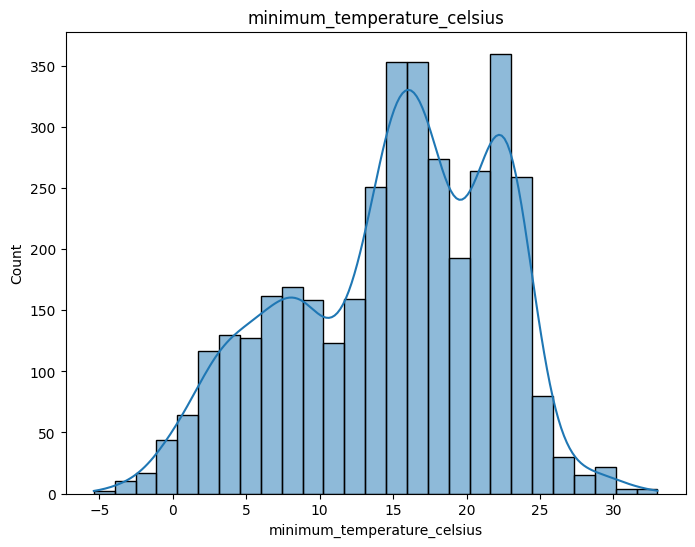

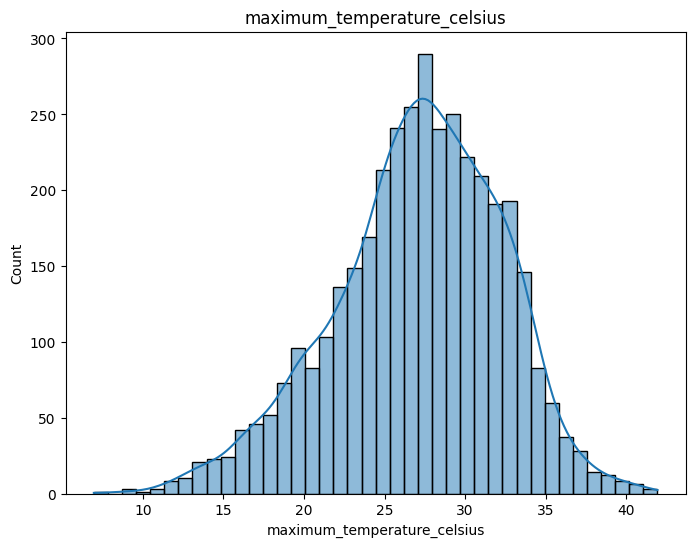

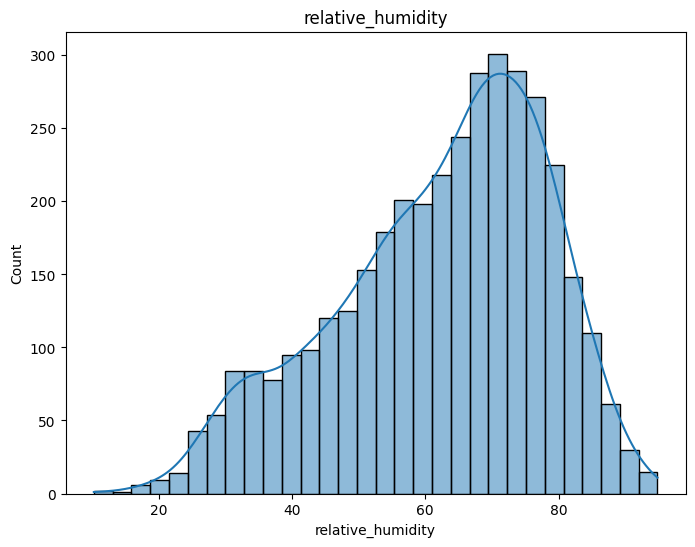

In [90]:
# Se repite el proceso con un ciclo for pero ahora es en un histograma para ver la distribucion de algunos datos
lista_columnas_6=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased","cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius","maximum_temperature_celsius","relative_humidity"]

# Crear histogramas de las variables numericas 
for i in data_latinoamerica_paises[lista_columnas_6]:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed','cumulative_deceased','cumulative_recovered','cumulative_vaccine_doses_administered']:
        fig, ax=plt.subplots(figsize=(8,6))
        sns.histplot(data_latinoamerica_paises[i],kde=True)
        plt.title(i)
        plt.show()

Analizaremos variables especificas, con el fin de tratar de entender el comportamiento de los casos respecto a la temperatura.

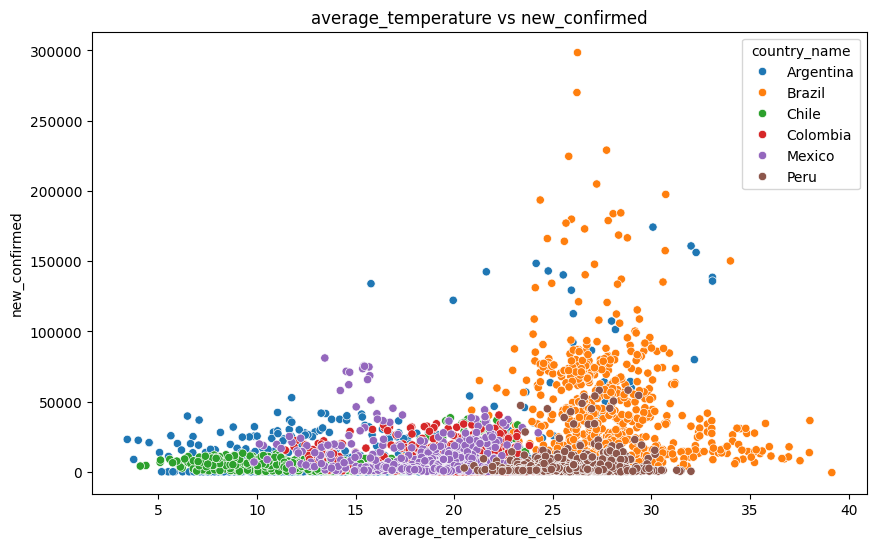

In [91]:
# Grafica de average_temperature vs new_confirmed 
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x='average_temperature_celsius',y='new_confirmed',data=data_latinoamerica_paises,hue='country_name')
plt.title('average_temperature vs new_confirmed')
plt.show() 

Se ha podido observar que en algunos paises la temperatura no influye en la cantidad de casos confirmados, sin embargo en otros paises sei se puede observar una relacion entre la temperatura y la cantidad de casos confirmados.
Como vimos que la temperatura tiene alguna relacion con los casos confirmados, realizaremos un analisis de la temperatura promedio con la cantidad de muertes.

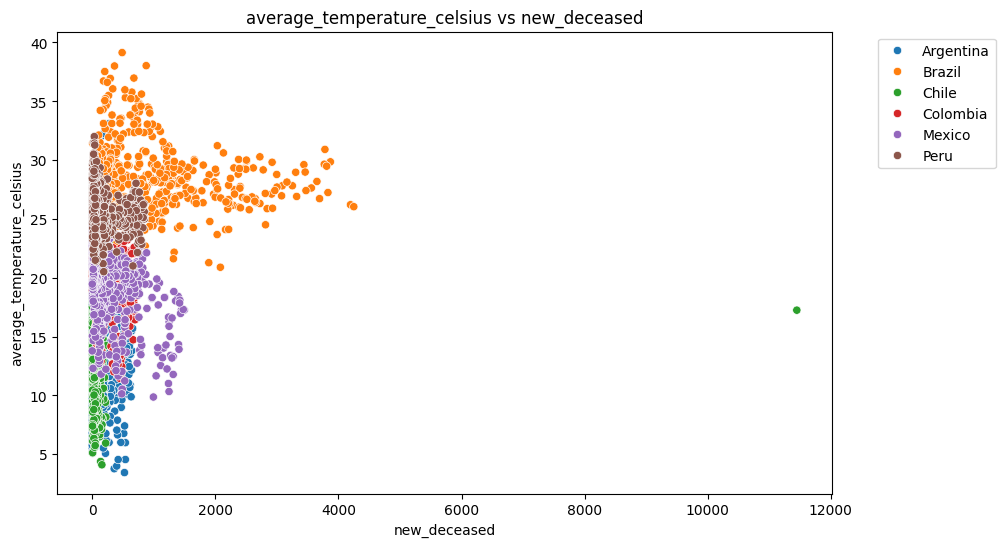

In [92]:
# Grafica de average_temperature_celsius vs new_deceased
fig,ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x='new_deceased',y='average_temperature_celsius',data=data_latinoamerica_paises,hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

En la grafica anterior se ve un comportamiento similar al de los casos confirmados, en algunos paises la temperatura no influye en la cantidad de muertes, sin embargo en otros paises si se puede observar una relación entre la temperatura y la cantidad de muertes.
Analizaremos como se comportan las variables en un estudio longitudinal, es decir a lo largo del tiempo.
Se hace una aproximación al observar las dosis administradas por mes en todos los paises.

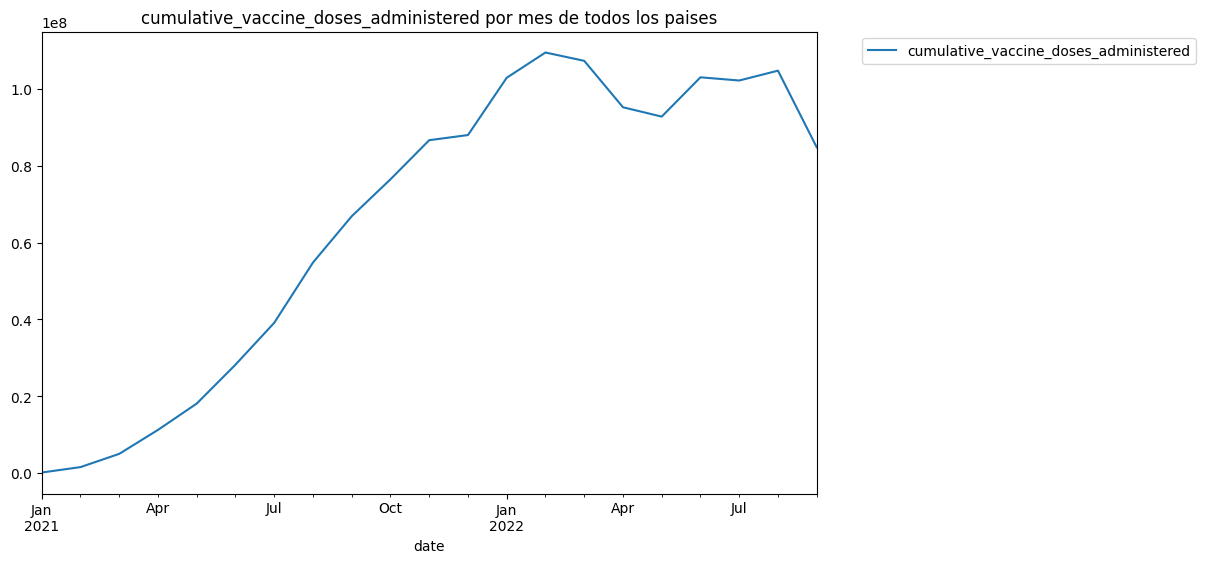

In [93]:
#Grafica de valores medios de todos los paises comulative_vaccine_doses_administered
fig,ax=plt.subplots(figsize=(10,6))
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes de todos los paises')
plt.show()

En la anterior grafica se puede observar que la cantidad de dosis administradas en los paises de Argentina, Brasil, Chile, Colombia, Mexico y Peru ha ido aumentando a lo largo del tiempo.

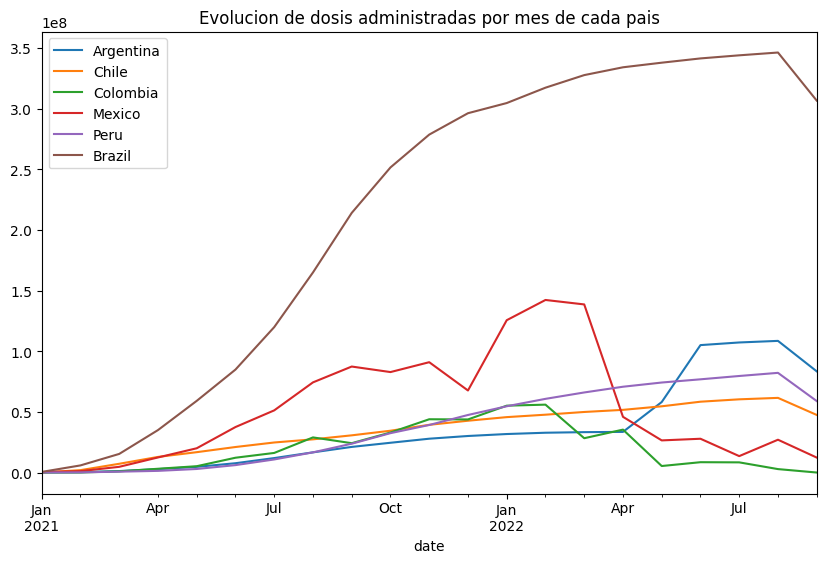

In [94]:
# Analisis detallado de las dosis administradas por mes en cada pais.
fig, ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()


plt.title('Evolucion de dosis administradas por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

En la grafica anterior, podemos observar que en algunos paises la cantidad de dosis administradas ha ido aumentando a lo largo del tiempo, sin embargo en otros paises la cantidad de dosis administradas ha ido disminuyendo. Esto puede ser debido a varios factores, como la cantidad de vacunas disponibles, la cantidad de personas que se han vacunado, entre otras causas.

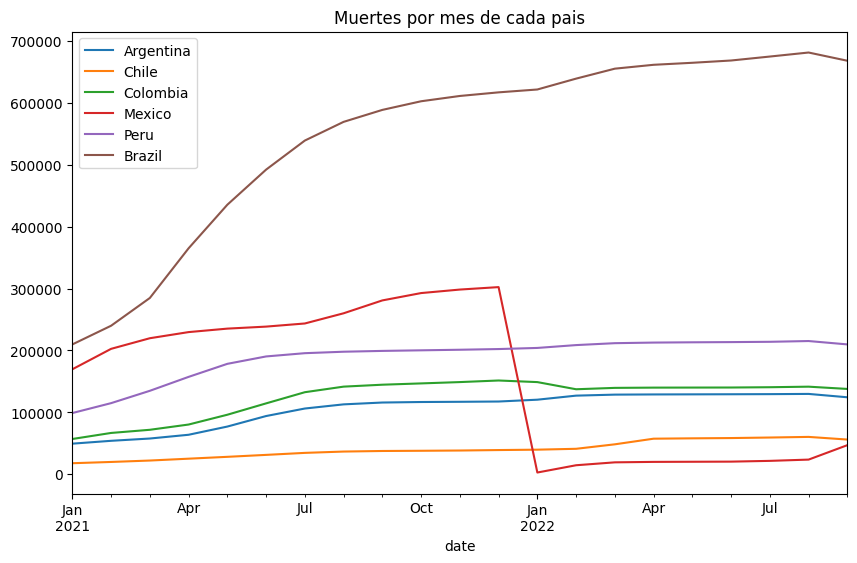

In [95]:
# Analisis de muertes por mes en cada pais.
fig, ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()


plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El pais que mayor cantidad de muertes tiene es Brasil, seguido de Mexico, Colombia, Argentina, Peru y Chile. Sin embargo, esto no quiere decir que estos paises sean los que peor han manejado la pandemia, hay que tener en cuenta la cantidad de habitantes de cada pais ademas de otros factores y cantidad de datos que se tienen.
La disminucion de casos en Mexico puede ser por una perdida de datos o una disminucion real de casos.

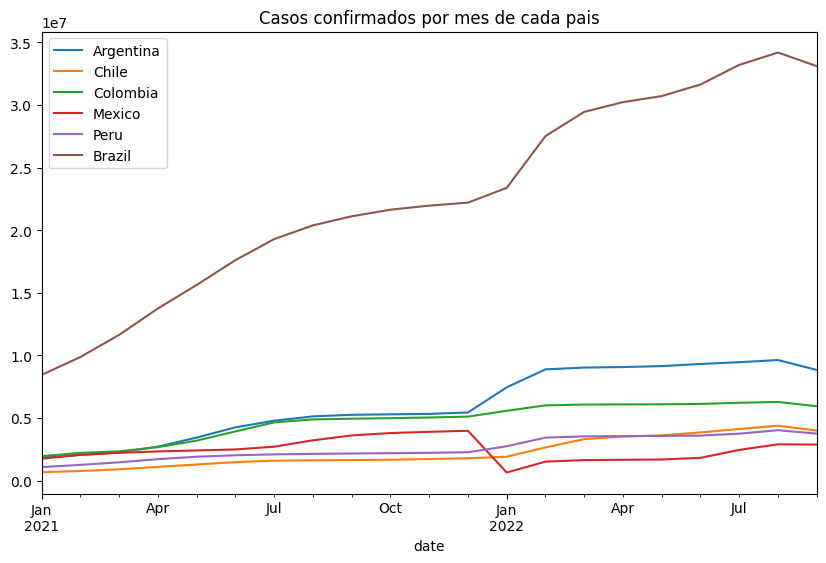

In [96]:
# Analisis de casos confirmados por mes en cada pais.
fig, ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()


plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El pais que mas casos confirmados ha tenido es Brasil, seguido de Mexico, Argentina, Colombia, Chile y Peru. Esto no quiere decir que manejan peor la pandemia, sino tener en cuenta la cantidad de habitantes de cada pais ademas de otros factores y cantidad de datos que poseemos.

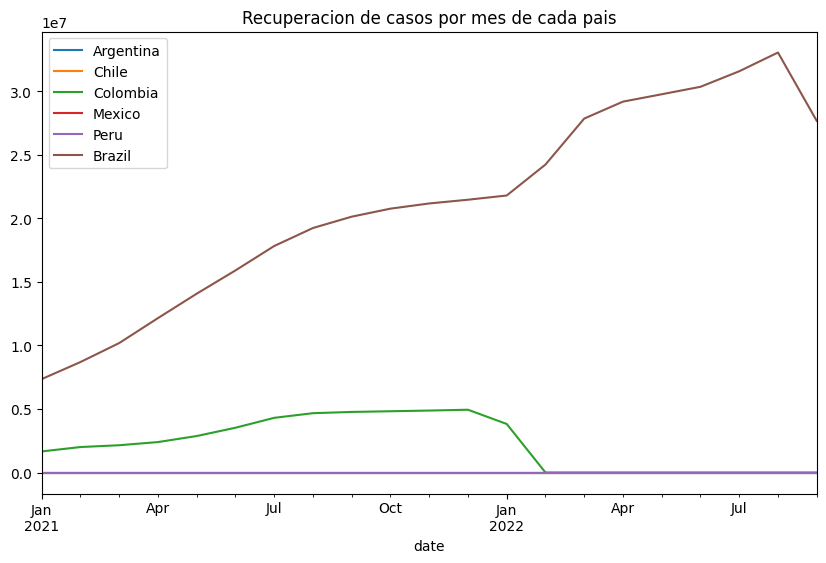

In [97]:
# Analisis de casos recuperados por mes en cada pais.
fig, ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()


plt.title('Recuperacion de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El pais que mejor se recupero fue Brasil, sin embargo esta relacionado a la cantidad de habitantes y vacunas disponibles.

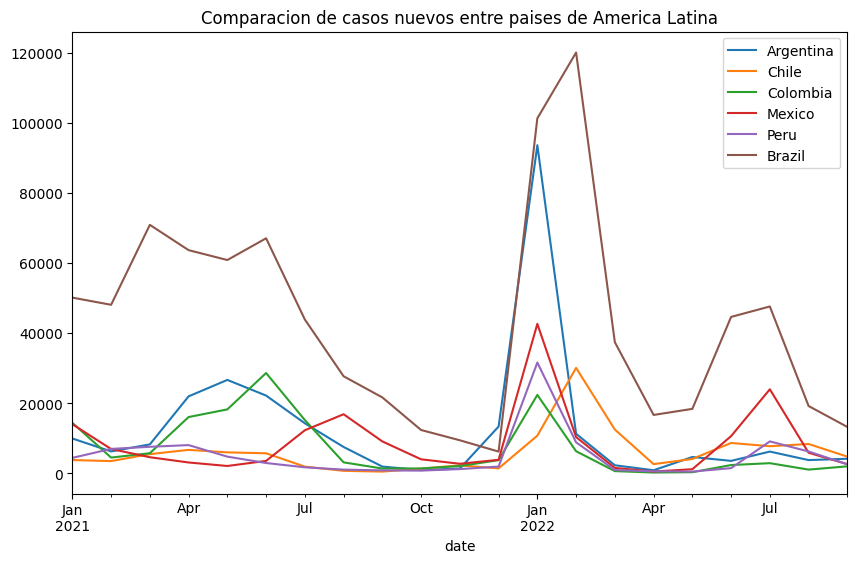

In [98]:
# Analisis comparativo de casos nuevos entre paises de America Latina
fig, ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()


plt.title('Comparacion de casos nuevos entre paises de America Latina')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

De los paises que mejor manejo la pandemia fue Chile, seguidos de Peru, Argentina, Colombia, Mexico y Brasil, se puede observar que la cantidad de muertes y casos confirmados es menor en estos paises ademas de no ser tan desproporcionada la cantidad de vacunas administradas.

Text(0.5, 1.0, 'Distribucion de dosis acumuladas por pais')

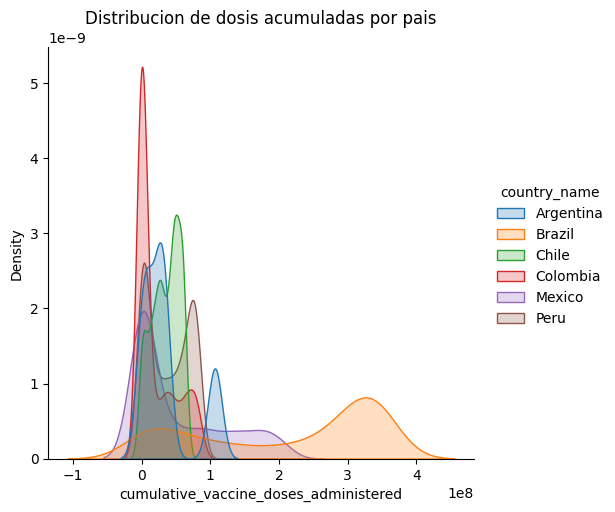

In [99]:
# Distribucion de dosisacumuladas por pais
sns.displot(data_latinoamerica_paises,x="cumulative_vaccine_doses_administered",hue="country_name",kind="kde",fill=True)
plt.title('Distribucion de dosis acumuladas por pais')

De los paises que peor manejaron la pandemia fue Brasil, seguido de Mexico, Colombia, Argentina, Peru y Chile, se puede observar que la cantidad de muertes y casos confirmados es mayor en estos paises ademas de ser desproporcionada la cantidad de vacunas administradas.

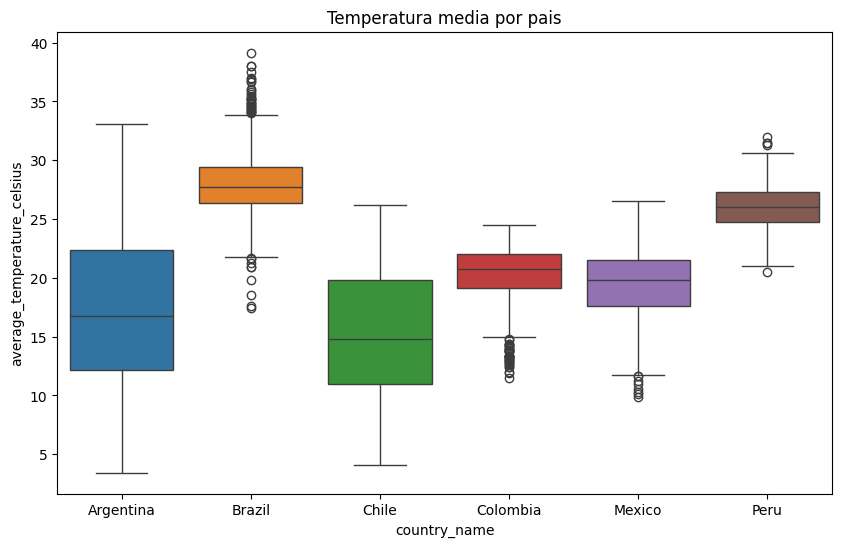

In [100]:
# average_temperature_celsius vs new_confirmed por pais boxplot 
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(x='country_name',y='average_temperature_celsius',data=data_latinoamerica_paises,hue='country_name')
plt.title('Temperatura media por pais')
plt.show()

Aunque Chile tiene rasgos diferentes de temperatura y eso podria haber afectado la cantidad de casos confirmados y muertes, se puede observar que Chile ha manejado mejor la pandemia que los demas paises.
Esto poco a poco nos ha llevado a concluir que los paises donde se podria crear los nuevos centros serian donde hay mas casos confirmados y muertes, ya que es donde se necesita mas ayuda.

In [101]:
# Verificar datos
data_latinoamerica_paises.country_name.unique() 

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

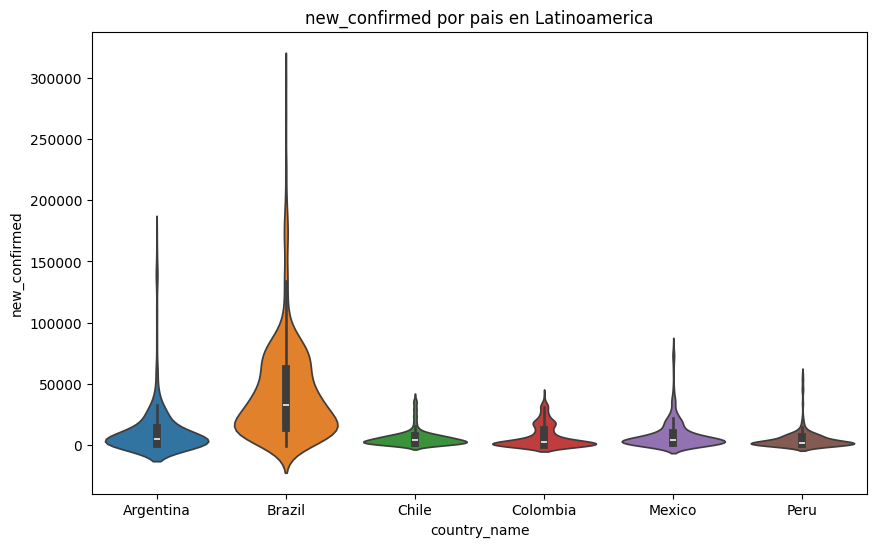

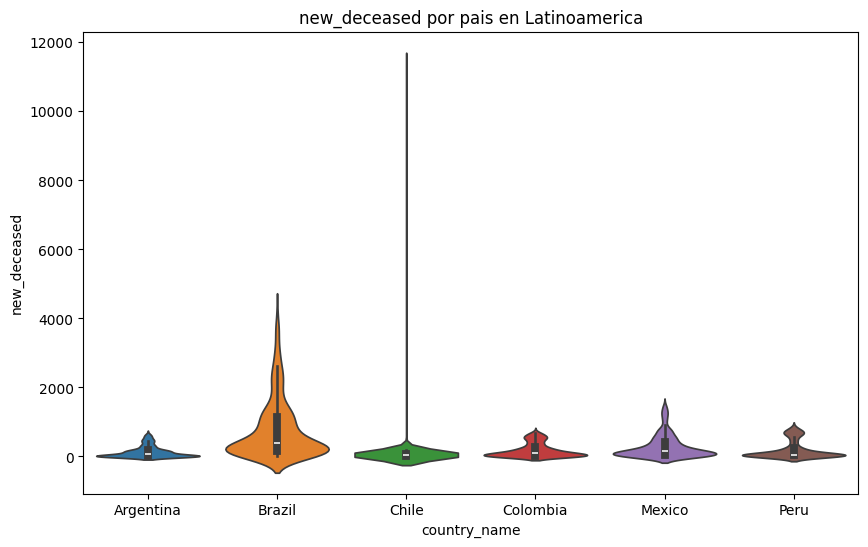

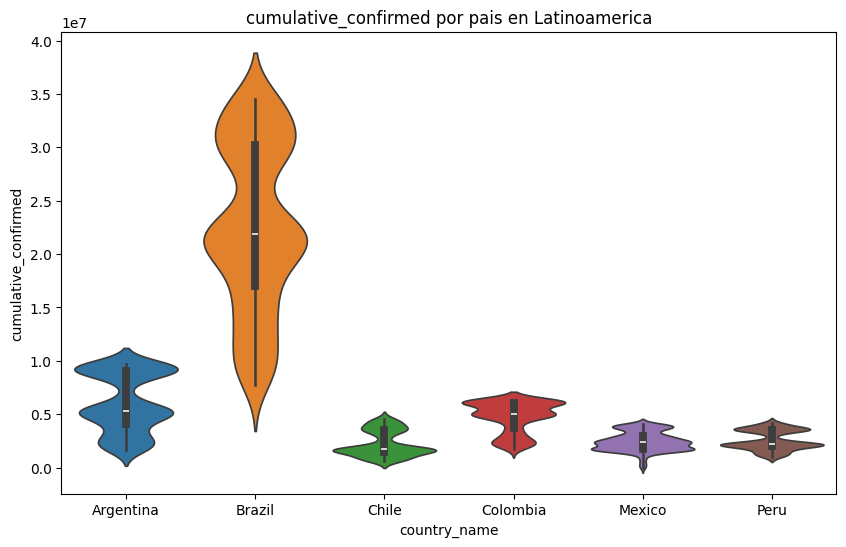

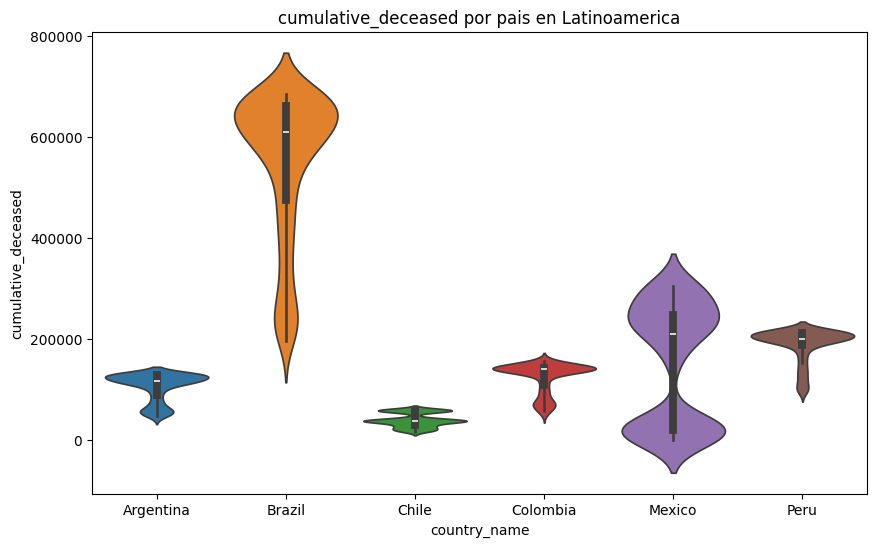

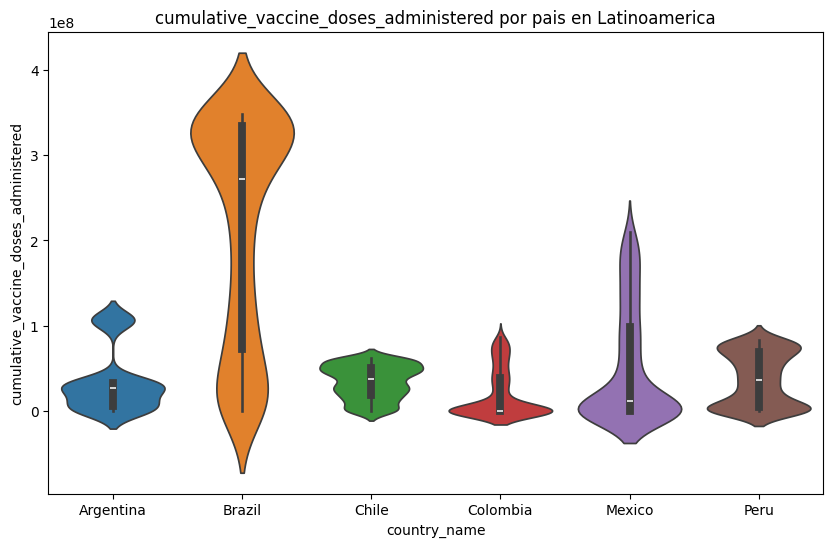

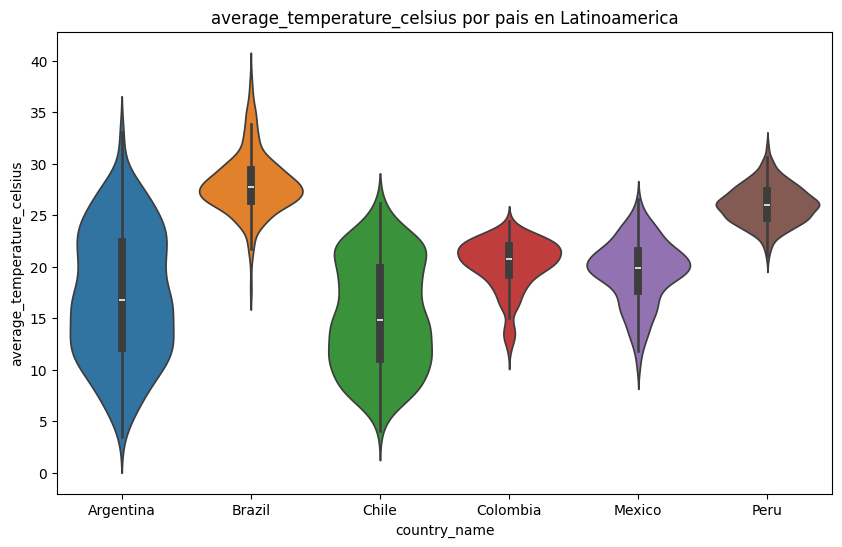

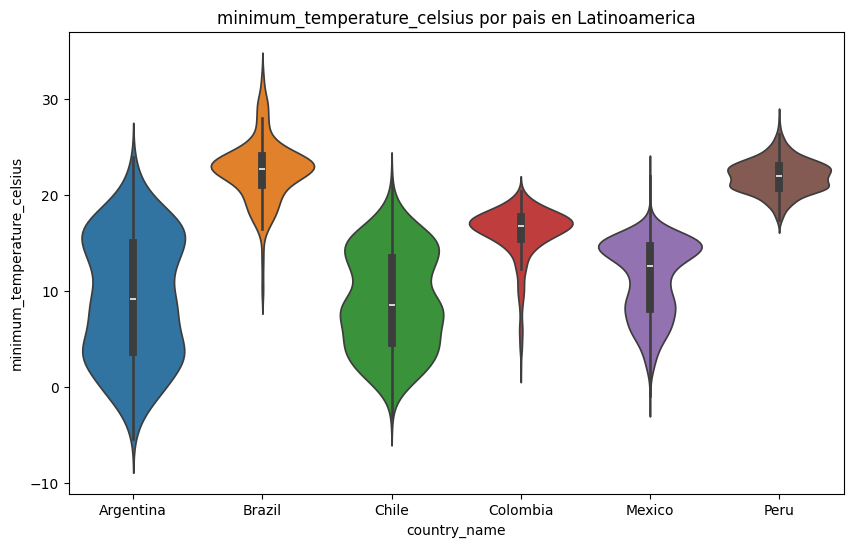

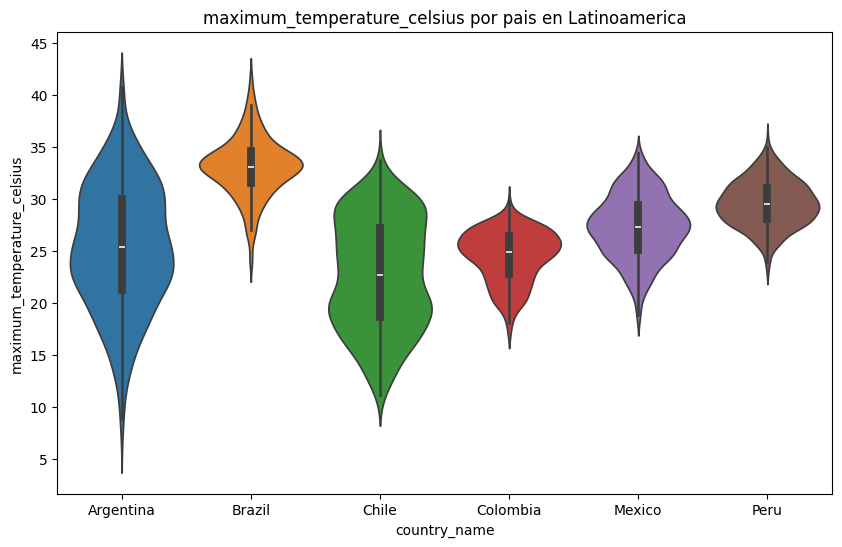

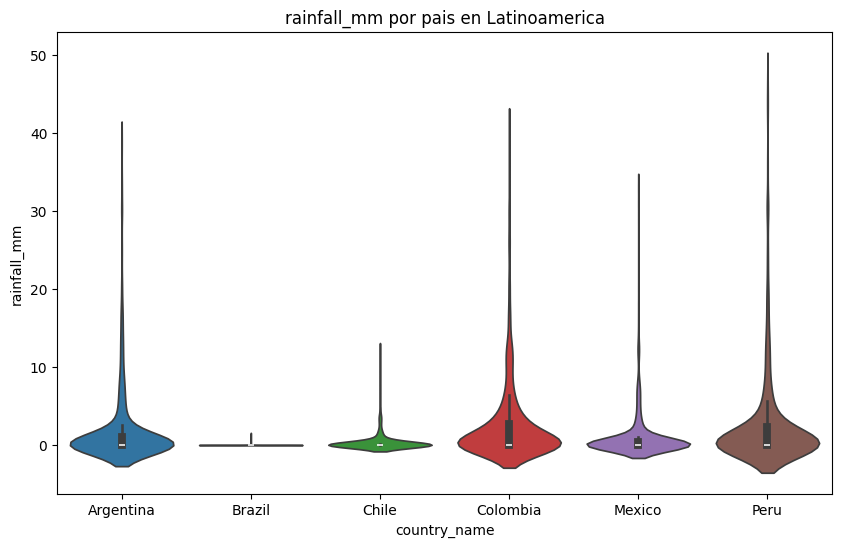

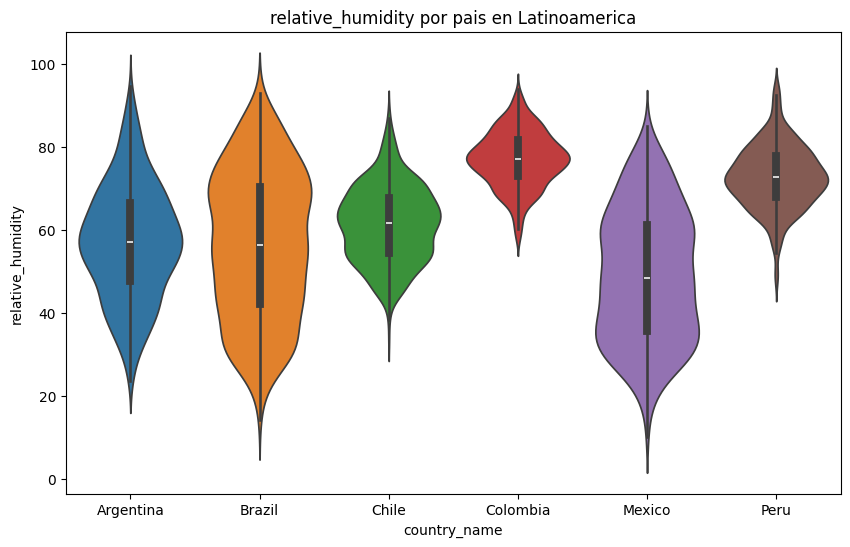

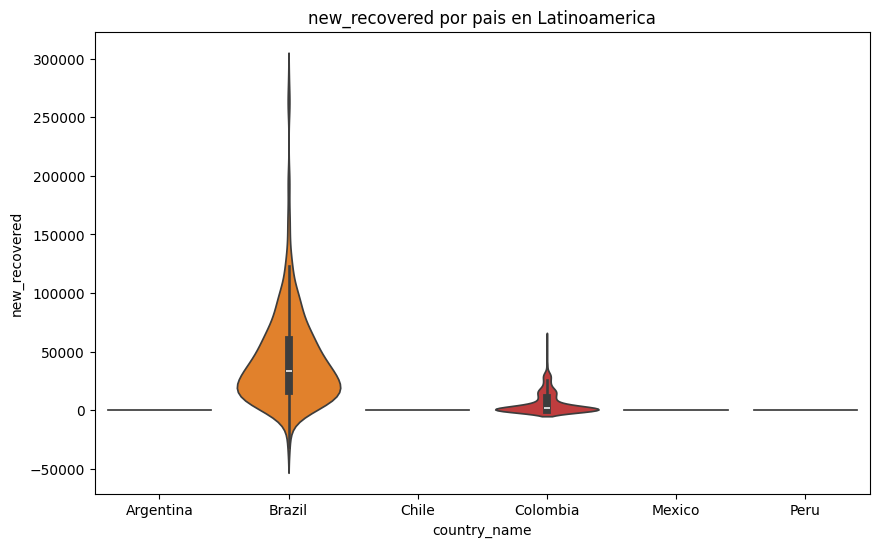

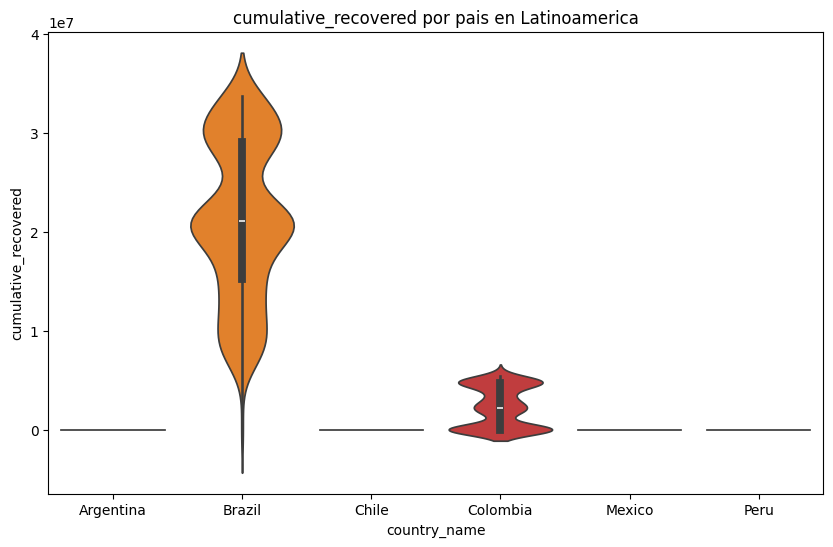

In [102]:
# Se crea un dataframe con las columnas mayores a 6, que son las que tienen valores diferentes para cada pais.
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in['location_key','date','country_code','latitude','longitude']:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i)

# Se agregan a columnas_mayores_6 la columna country name para hacer analisis por pais.
columnas_mayores_6.append ('country_name')

# Se crea un dataframe con las columnas mayores a 6 
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6] 

# Violinplot en todos los paises para variables numericas.
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in['location_key','date','country_code','latitude','longitude','country_name']:
        fig,ax=plt.subplots(figsize=(10,6))
        sns.violinplot(x='country_name',y=i,data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por pais en Latinoamerica')
        plt.show()

Realizamos la distribución de la población por grupos de edad en los paises seleccionados, para entender como se comporta la población en cada país y en un futuro poder tomar decisiones mas acertadas.

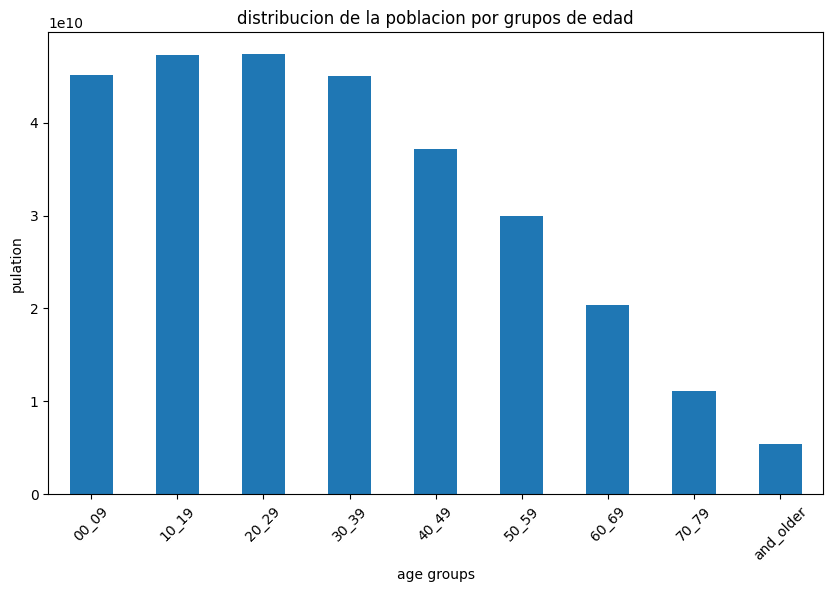

In [103]:
#Calculamos la distribución de la poblacion por grupos de edad
age_columns=['population_age_00_09','population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49','population_age_50_59','population_age_60_69','population_age_70_79','population_age_80_and_older']
age_distribution=data_latinoamerica_paises[age_columns].sum()
plt.figure(figsize=(10,6))
age_distribution.plot(kind='bar',stacked=True)
plt.xlabel('age groups')
plt.ylabel('pulation')
plt.title('distribucion de la poblacion por grupos de edad')
plt.xticks(range(len(age_columns)),[col.split('_')[-2]+'_'+col.split('_')[-1]for col in age_columns],rotation=45)
plt.show()

Esta grafica es interesante porque nos permite ver la poblacion por grupo de edad en cada pais, lo que nos puede ayudar a entender como se comporta la poblacion segun su rango etario.

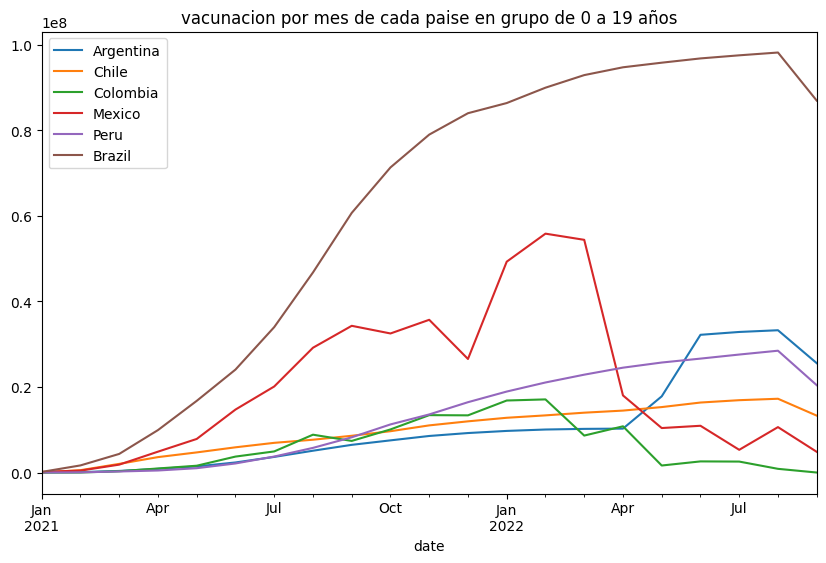

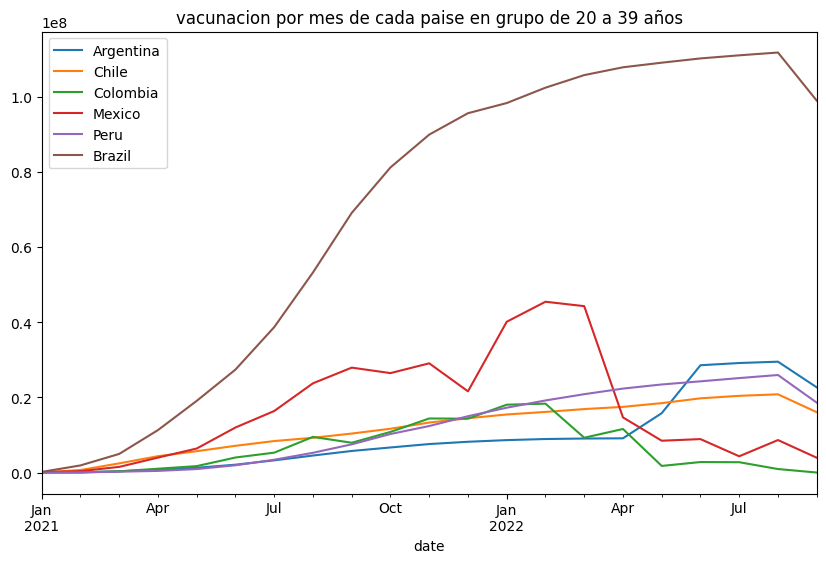

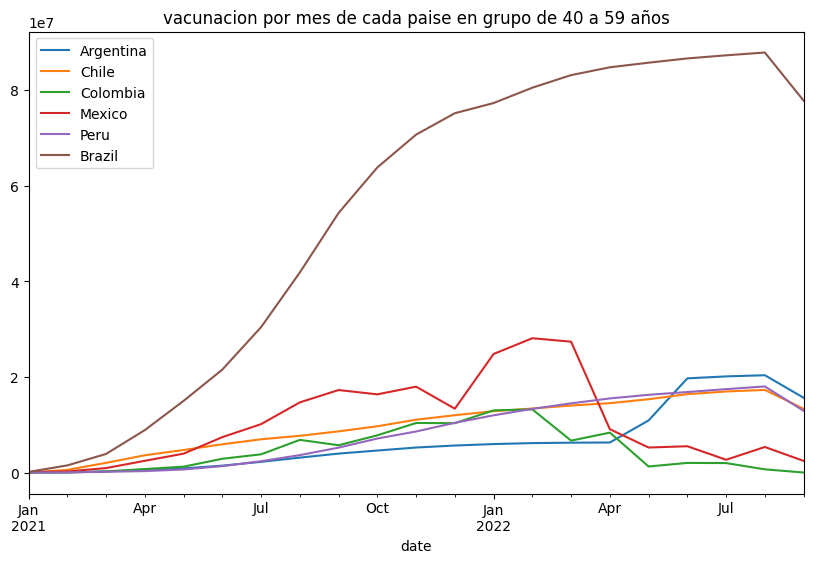

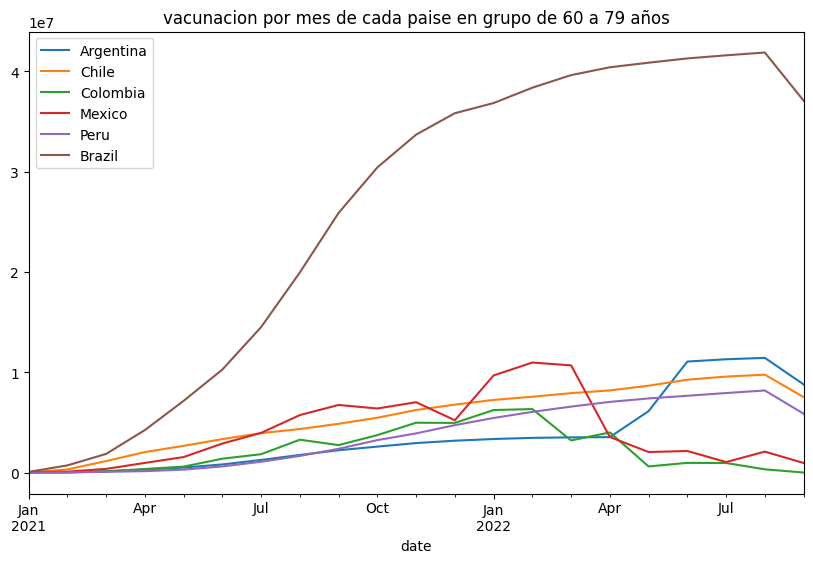

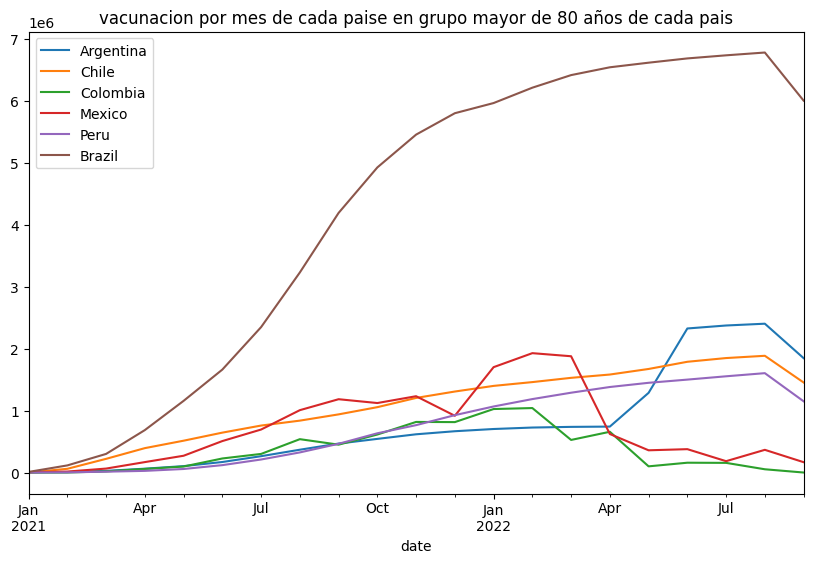

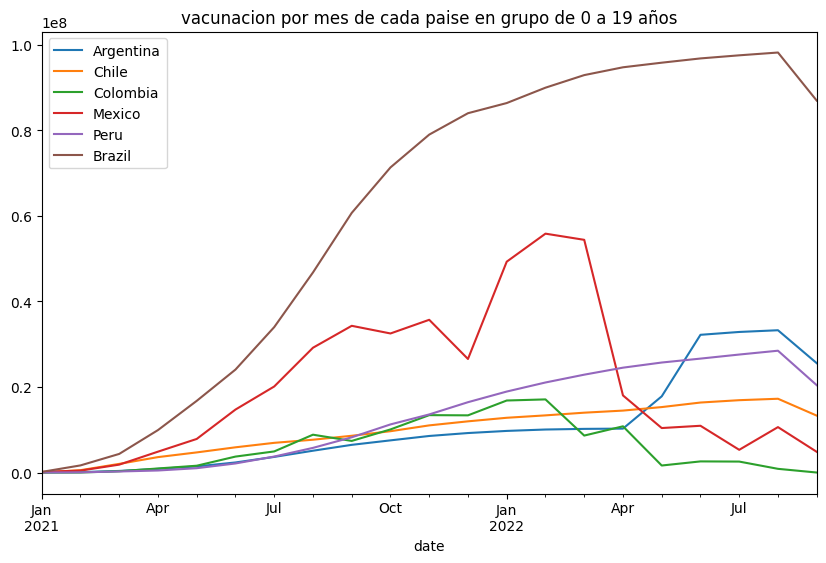

In [104]:
#Grupo etario más vacunado
data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']


data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_20_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_40_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_60_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']


data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)


data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)


data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_39_vacunados'].sum()
data_latinoamerica_paises['population_age_40_59_vacunados'].sum()
data_latinoamerica_paises['population_age_60_79_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()


#Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('vacunacion por mes de cada paise en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()


fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('vacunacion por mes de cada paise en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()


fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('vacunacion por mes de cada paise en grupo de 40 a 59 años')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()


fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('vacunacion por mes de cada paise en grupo de 60 a 79 años')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()


fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('vacunacion por mes de cada paise en grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()


fig,ax=plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('vacunacion por mes de cada paise en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()


Revisamos la mortalidad por género para identificar la población mas vulnerable en cada pais, así podríamos ver cual población se vacunaria primero.

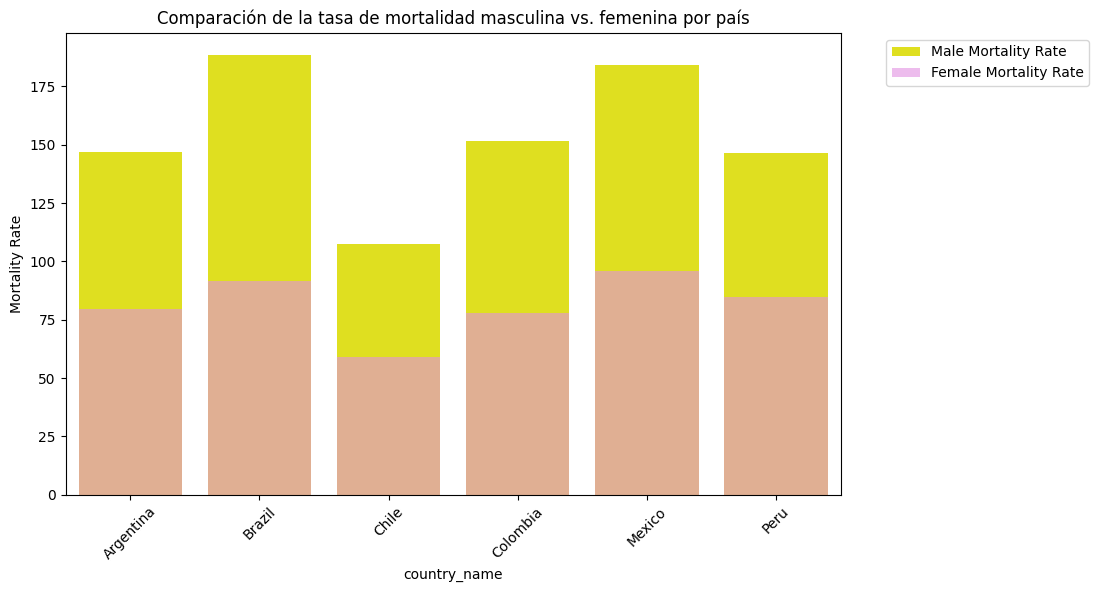

In [105]:
#Grafica de mortalidad por genero

plt.figure(figsize=(10,6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='yellow', label='Male Mortality Rate')
sns.barplot(data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='violet', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

De acuerdo a la grafica de mortalidad, se puede observar que en todos los paises la cantidad de muertes es mayor en los hombres que en las mujeres, por lo que se podría decir que los hombres son más vulnerables a la enfermedad o están menos protegidos.

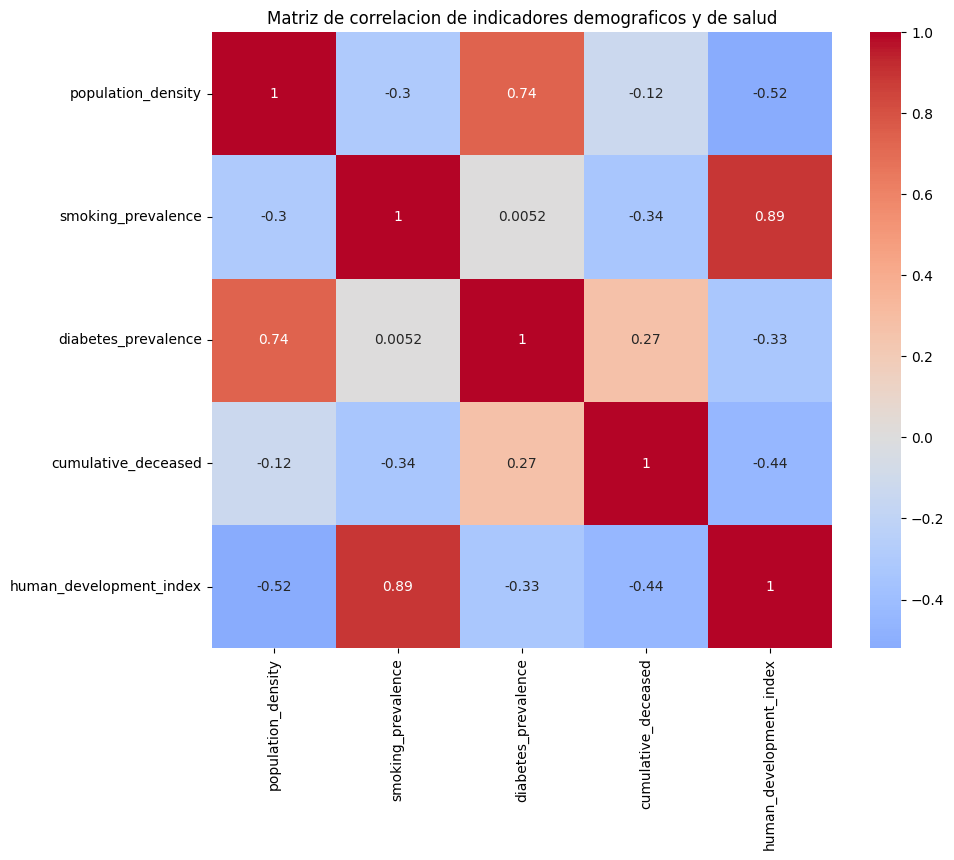

In [106]:
#Matriz de correlacion de indicadores demograficos y de salud
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data_latinoamerica_paises[columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlacion de indicadores demograficos y de salud')
plt.show()

De esta matriz podemos observar que el fumar y tener diabetes son las enfermedades preexistentes que mas afectan a la población en los paises seleccionados, por lo que se podria decir que estas enfermedades son las que mas han causado muertes en los paises mencionados, sin embargo esto no quiere decir que son las unicas enfermedades que han causado muertes sino que son las mas comunes.

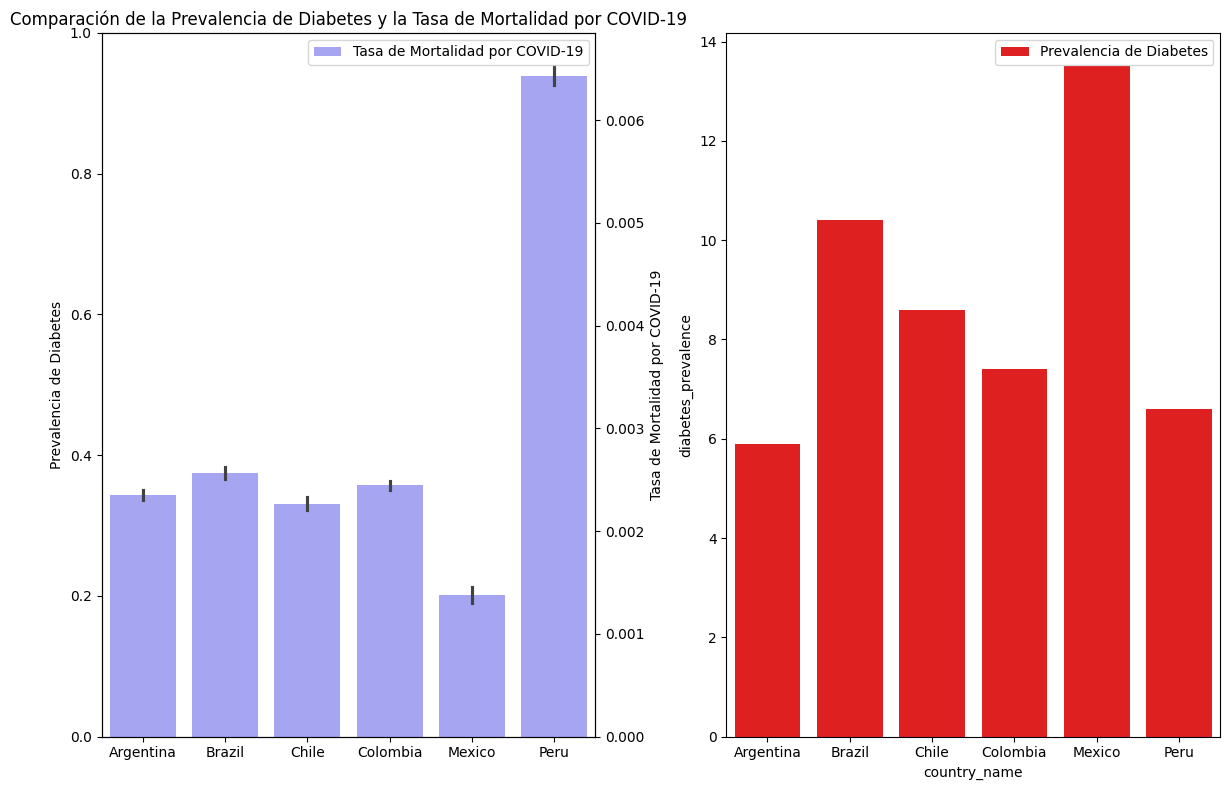

In [107]:
#Comparacion de la prevalencia de diabetes y la tasa de mortalidad por covid-19
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(12,8))
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises['country_name'], y=data_latinoamerica_paises['diabetes_prevalence'], color='red', label='Prevalencia de Diabetes')
ax2 = ax.twinx()
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises['country_name'], y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], color='blue', label='Tasa de Mortalidad por COVID-19', alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

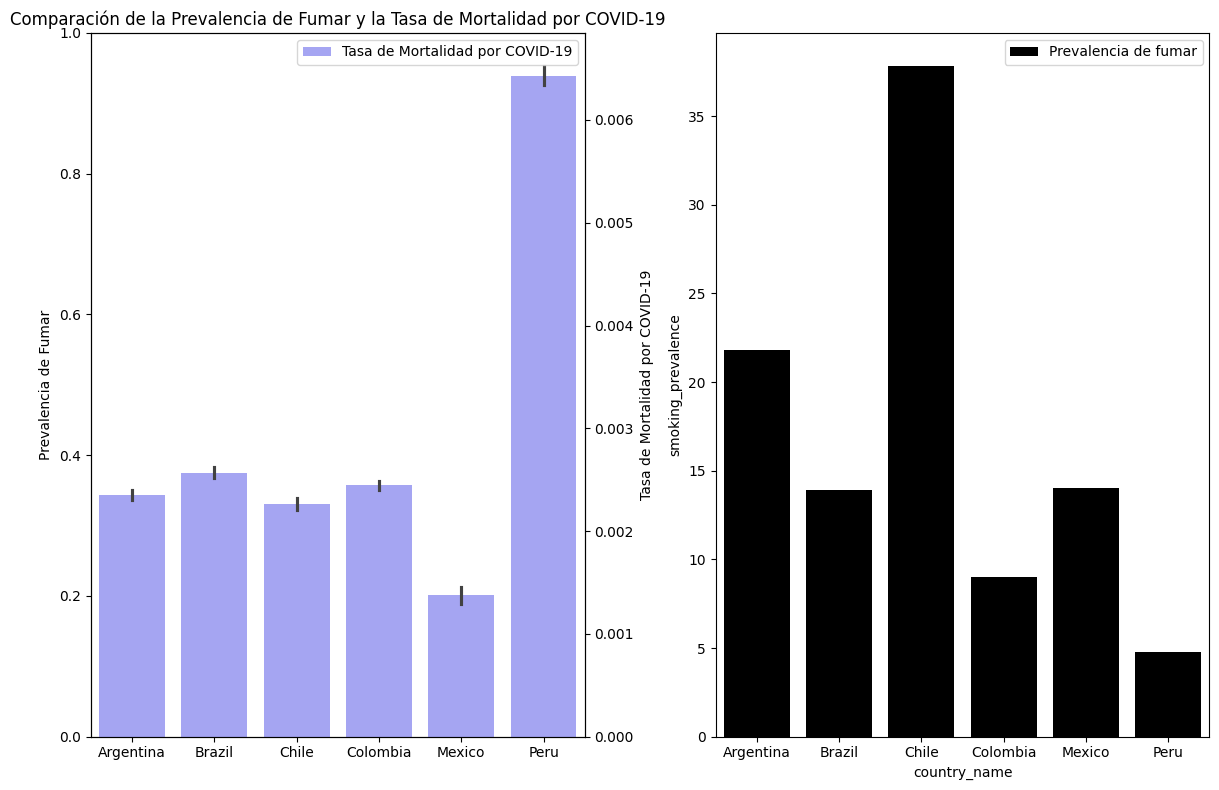

In [108]:
#Comparacion de la prevalencia de fumadores y la tasa de mortalidad por covid-19
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(12,8))
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises['country_name'], y=data_latinoamerica_paises['smoking_prevalence'], color='black', label='Prevalencia de fumar')
ax2 = ax.twinx()
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises['country_name'], y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], color='blue', label='Tasa de Mortalidad por COVID-19', alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

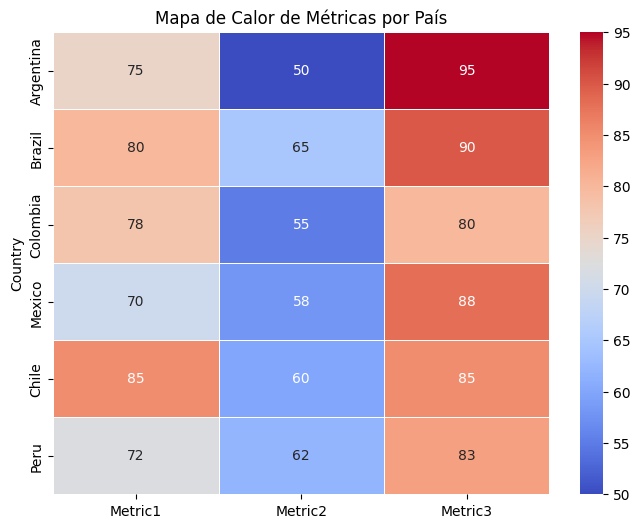

In [109]:
# Crear un DataFrame con las métricas por país
data = pd.DataFrame({
    'Country': ['Argentina', 'Brazil', 'Colombia', 'Mexico', 'Chile', 'Peru'],
    'Metric1': [75, 80, 78, 70, 85, 72],
    'Metric2': [50, 65, 55, 58, 60, 62],
    'Metric3': [95, 90, 80, 88, 85, 83]
})

# Usar el nombre del país como índice
data.set_index('Country', inplace=True)

# Crear el mapa de calor
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.heatmap(data, annot=True, cmap='coolwarm', linewidths=0.5)

# Título del gráfico
plt.title('Mapa de Calor de Métricas por País')
plt.show()

El mapa de calor revela que Chile tiene el valor más alto en la Métrica 1 (85), mientras que Brasil destaca en las Métricas 1 y 2. Argentina sobresale en la Métrica 3 con un valor de 95, mientras que Colombia tiene el valor más bajo en esta métrica (80). México y Perú tienen un desempeño similar en la Métrica 2, mostrando valores intermedios en general. Es decir que, Chile y Argentina destacan en diferentes métricas, mientras que Colombia presenta los valores más bajos en varias áreas.

WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWW
WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWW

TERCER AVANCE

Analisis del comportamiento semanal y anual de datos agrupados.

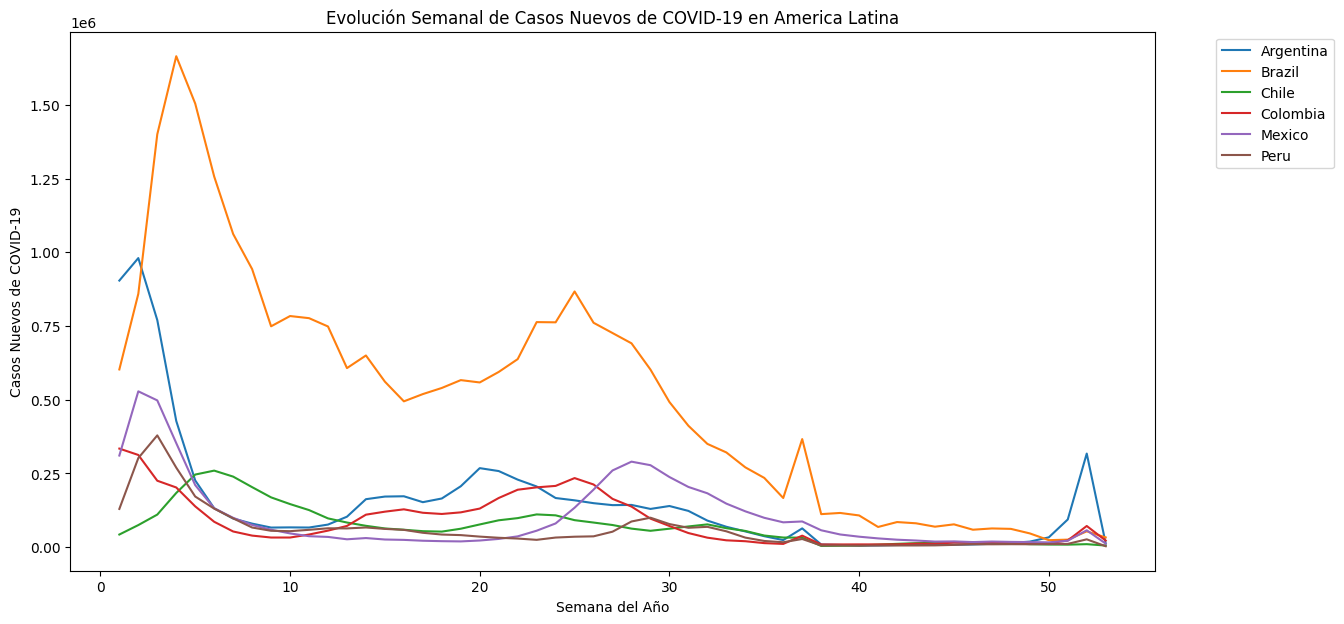

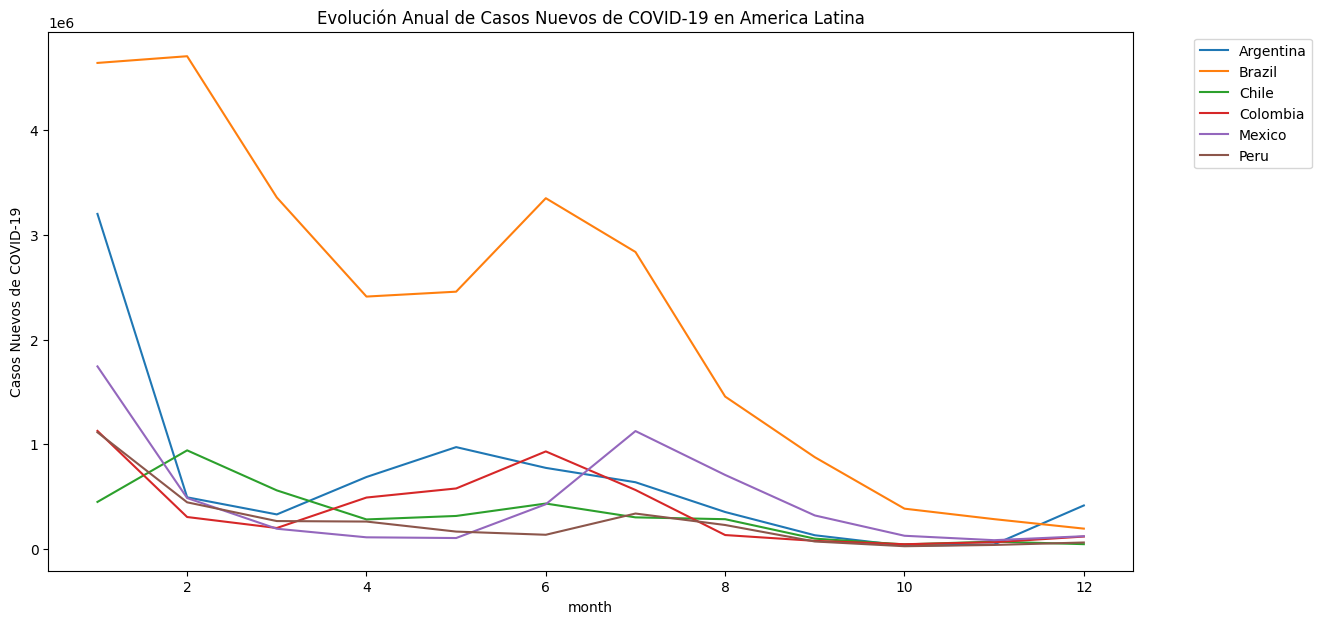

In [110]:
#Analizamos como evolucionan los de COVID-19 en America Latina a lo largo del tiempo por semana
data_latinoamerica_paises['week']=data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises['year'] = data_latinoamerica_paises.index.isocalendar().year
weekly_cases = data_latinoamerica_paises.groupby(['country_name','week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=country)

plt.xlabel('Semana del Año')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Semanal de Casos Nuevos de COVID-19 en America Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#ahora por año
data_latinoamerica_paises['month'] = data_latinoamerica_paises.index.month
yearly_cases = data_latinoamerica_paises.groupby(['country_name','month'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    plt.plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=country)

plt.xlabel('month')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Anual de Casos Nuevos de COVID-19 en America Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

De la grafica anterior se puede observar que la cantidad de casos confirmados y muertes ha ido disminuyendo a lo largo del tiempo, sin embargo esto no quiere decir que la pandemia haya terminado, ya que la cantidad de casos confirmados y muertes sigue siendo alta, ademas se nota un pico en las fechas finales.

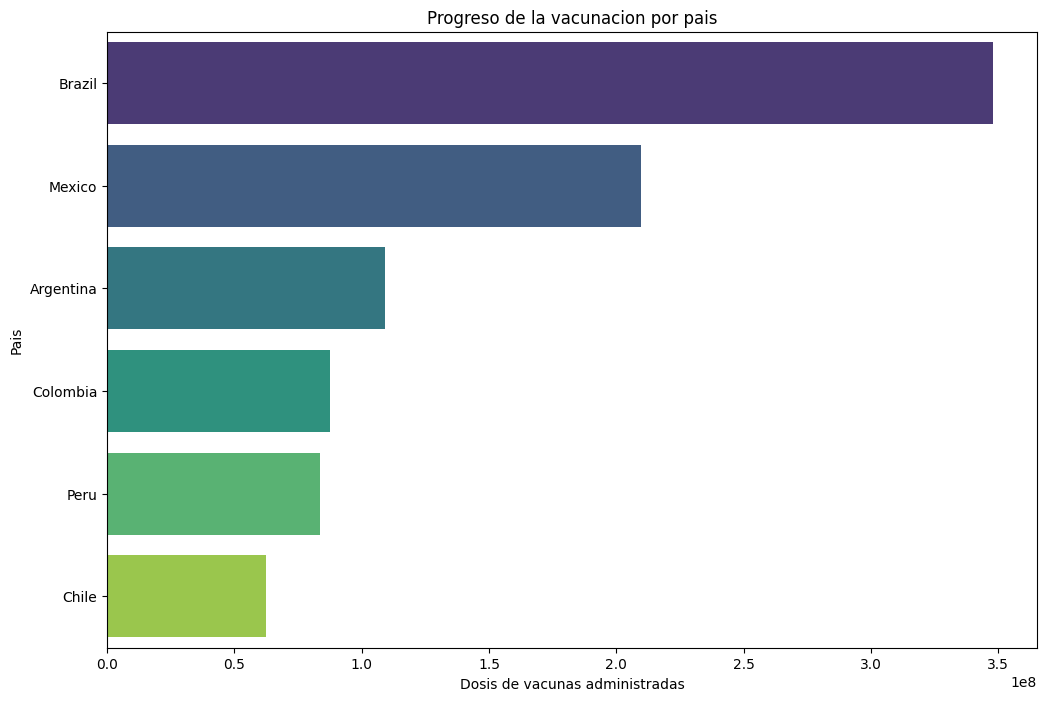

In [111]:
#Progreso de la vacunación por pais
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('Pais')
plt.title('Progreso de la vacunacion por pais')
plt.show()

El pais con mayor dosis administradas es Brasil seguido de Mexico, Argentina, Colombia, Chile y Perú.

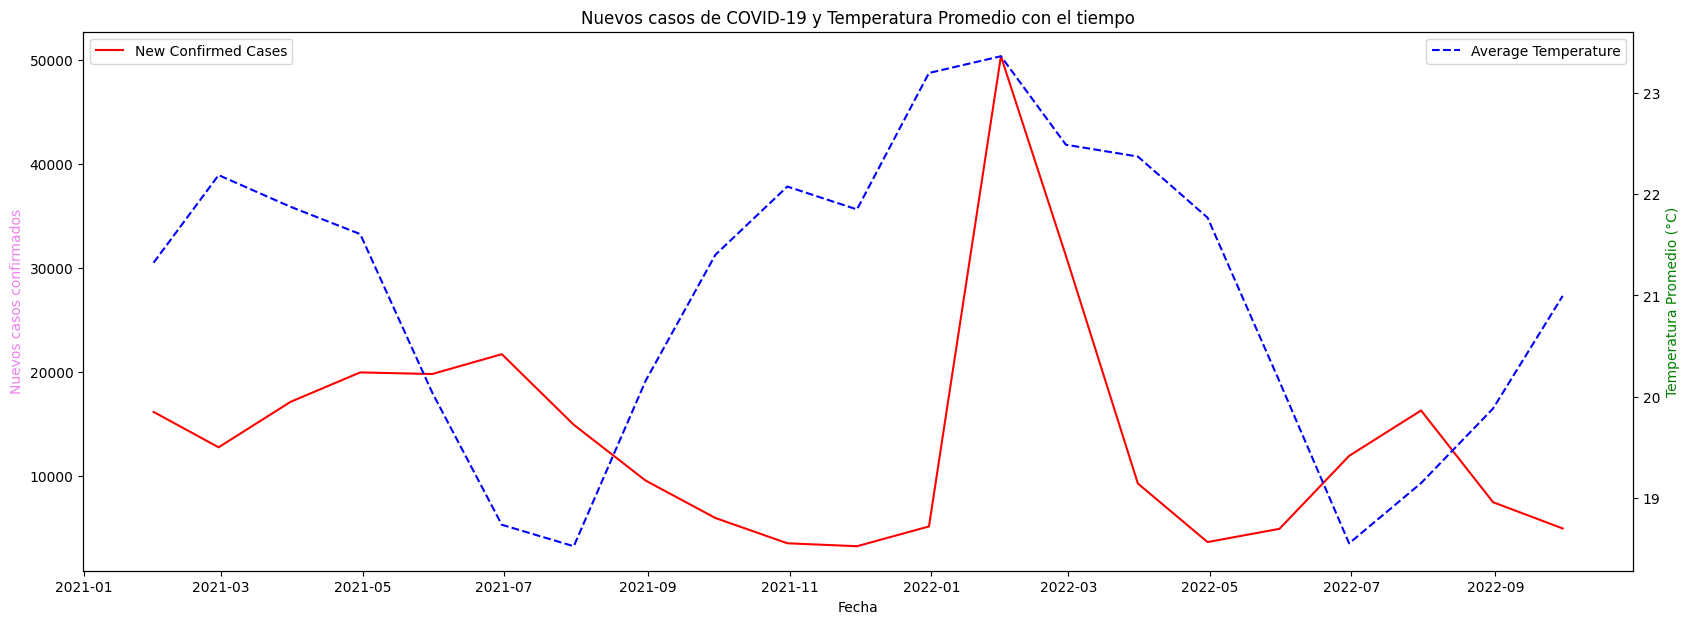

In [112]:
#Grafica de relacion entre la temperatura y promedio y los nuevos casos confirmados de COVID-19
plt.figure(figsize=(20, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmed Cases')
ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Average Temperature', linestyle='--')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='violet')
ax2.set_ylabel('Temperatura Promedio (°C)', color='green')
plt.title('Nuevos casos de COVID-19 y Temperatura Promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Podemos observar que la temperatura promedio ha ido aumentando y los casos confirmados han ido disminuyendo, sin embargo hubo un pico antes del mes de marzo pero disminuyo rapidamente, esto puede ser por la cantidad de vacunas administradas o por la cantidad de personas que se han vacunado.

Cada pais tiene un impacto debido a la urbanizacion y a la densidad de la población, por lo que se analiza la densidad de población en cada pais.

C:\Users\cesis\AppData\Local\Temp\ipykernel_30796\3028278184.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='viridis')


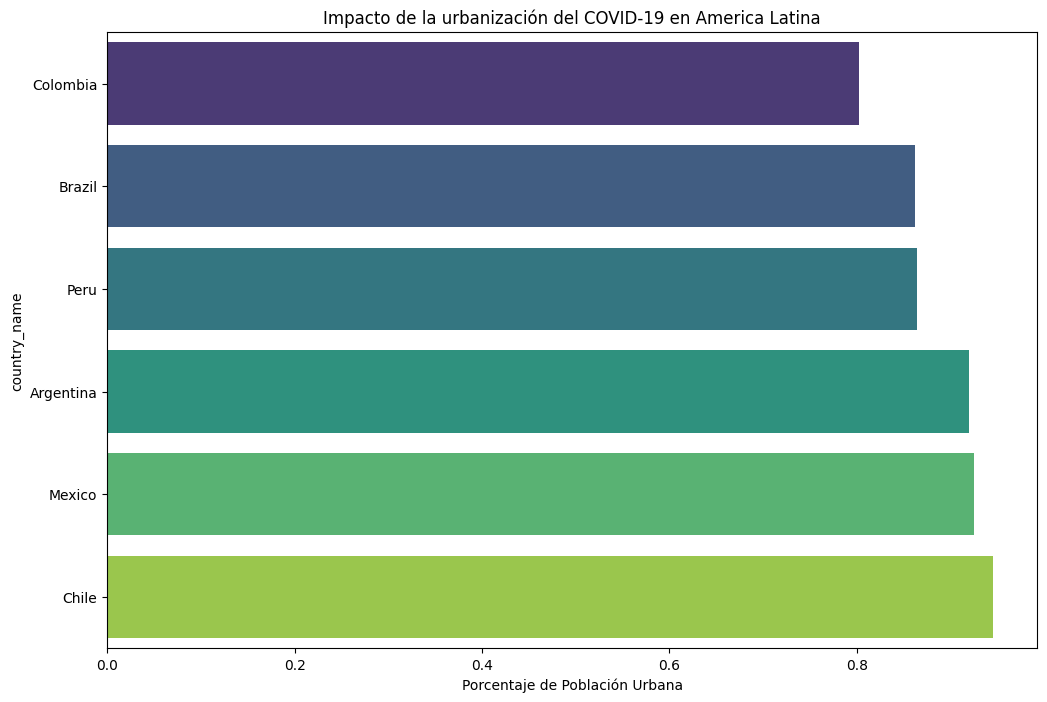

In [113]:
#Impacto de la urbanización del COVID-19 en America Latina
data_latinoamerica_paises['urban_population_percentage'] =data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')


plt.figure(figsize=(12, 8))
sns.barplot(x=urban_cases['urban_population_percentage'], y=urban_cases.index, palette='viridis')
plt.xlabel('Porcentaje de Población Urbana')
plt.title('Impacto de la urbanización del COVID-19 en America Latina')
plt.show()

El pais con mayor impacto en la propaganción fue Chile, aunque es extraño ya que Chile fue uno de los paises que mejor manejó la pandemia, sin embargo esto puede ser debido a la densidad a la población en Chile.

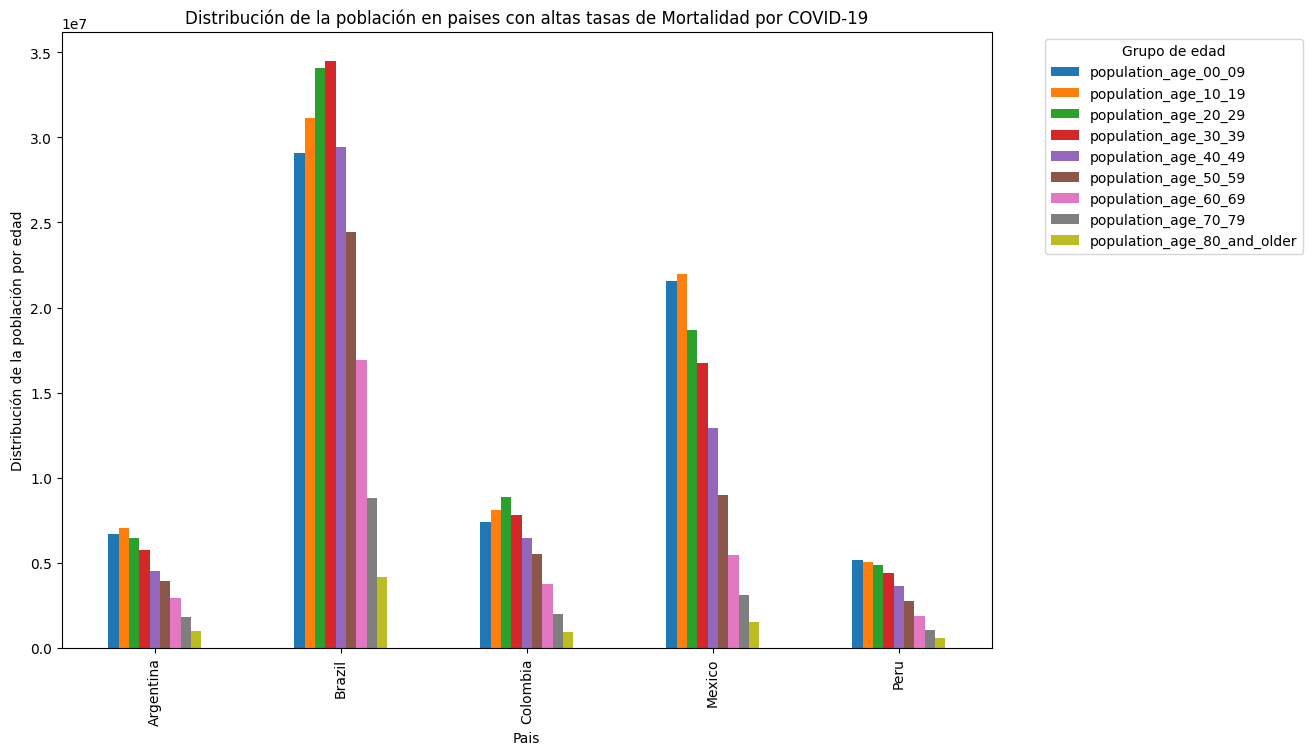

In [125]:
#Distribución de la población en paises con altas tasas de Mortalidad por COVID-19
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()



age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('Pais')
plt.ylabel('Distribución de la población por edad')
plt.title('Distribución de la población en paises con altas tasas de Mortalidad por COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de edad')
plt.show()

El grafico muestra claramente la desigualdad en cantidades de población por grupos de edad en los paises seleccionados, podemos ver las estrategias de vacunacion para mitigar la mortalidad y los casos confirmados.

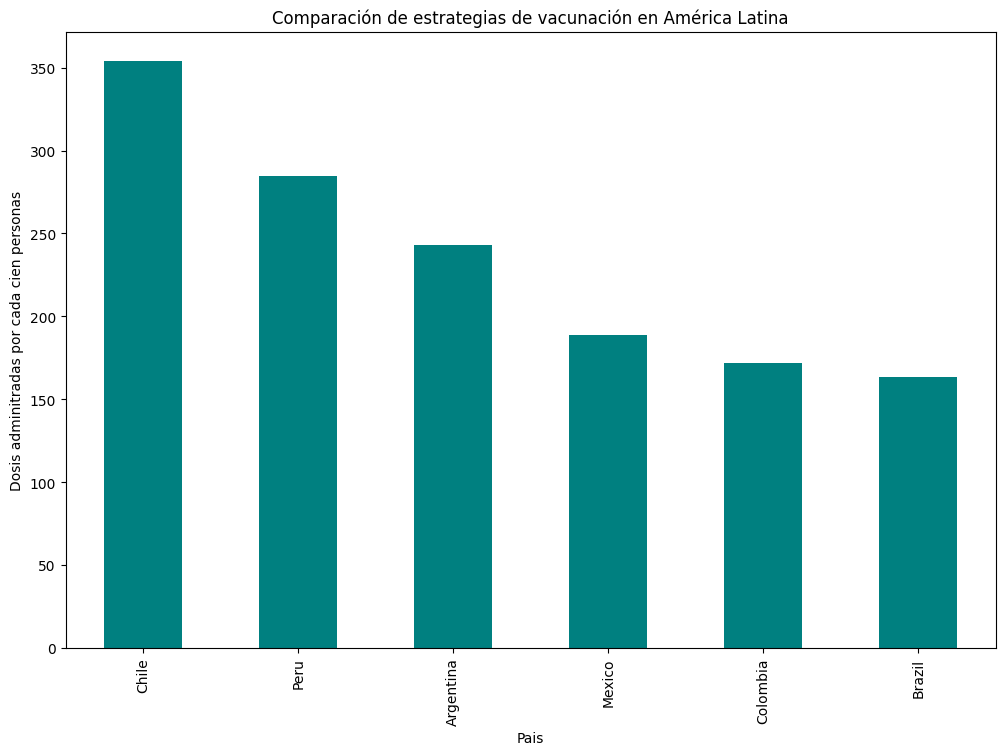

In [126]:
#Comparación de estrategias de vacunación en América Latina
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].max() * 100
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal')
plt.xlabel('Pais')
plt.ylabel('Dosis adminitradas por cada cien personas')
plt.title('Comparación de estrategias de vacunación en América Latina')
plt.show()

Nuevamente vemos el buen resultado de las politicas de Chile y una clara falla en Colombia y Brasil.
Con esto vamos definiendo los paises que necesitan mas ayuda y donde se deberan crear los nuevos centros.

In [128]:
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index

In [130]:
data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index

Index(['Brazil', 'Mexico', 'Peru', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [131]:
data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index

Index(['Chile', 'Argentina', 'Colombia', 'Peru', 'Mexico'], dtype='object', name='country_name')

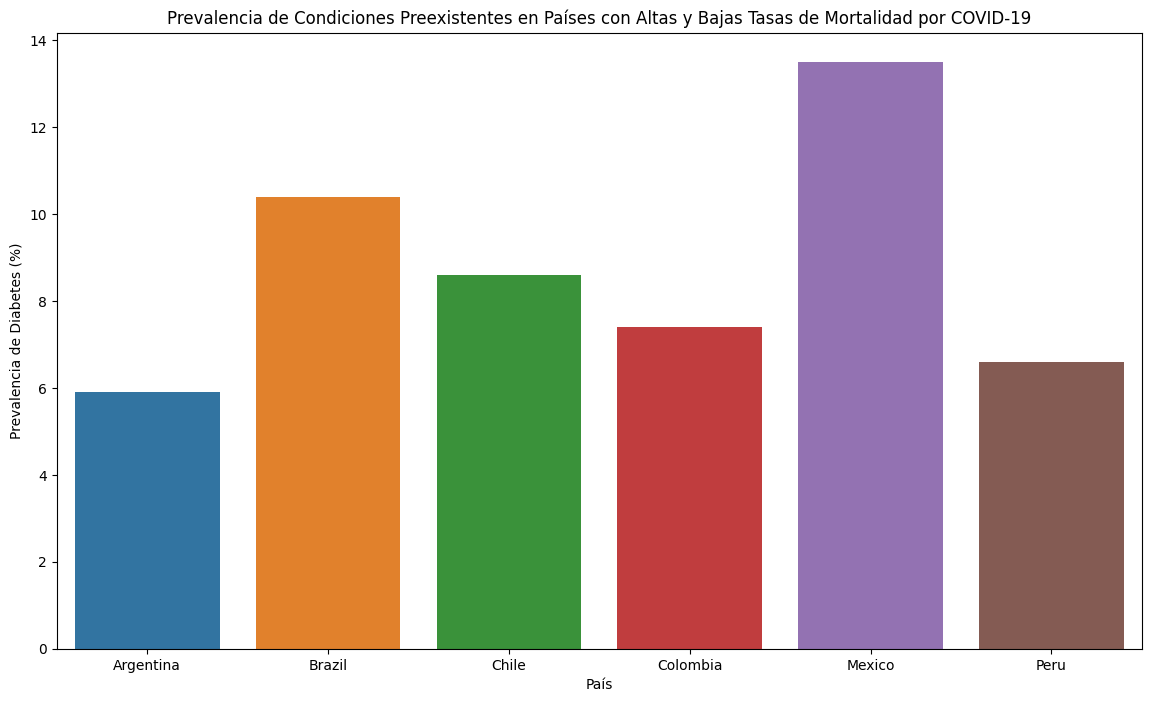

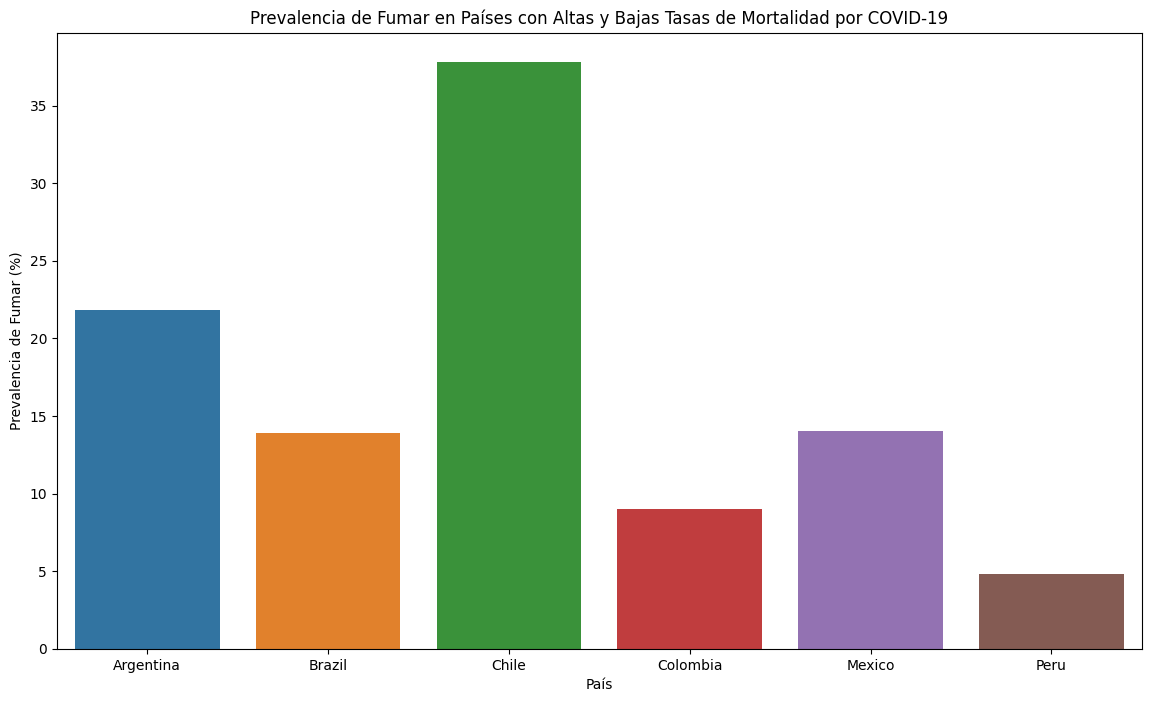

In [134]:
# Prevalencia de Diabetes
top_countries =data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
botton_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
conditions_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries.union(botton_countries))]

plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Diabetes (%)')
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()


# Prevalencia de Fumar
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

Identificamos que la Diabetes afecta mucho mas a Mexico y a Brasil, por lo que se podria decir que estos paises son los que más han sufrido por la diabetes. Respecto a Fumar se puede observar que afecta mas a Chile y Argentina, por lo que se podria concluir que estos paises son los afectados.

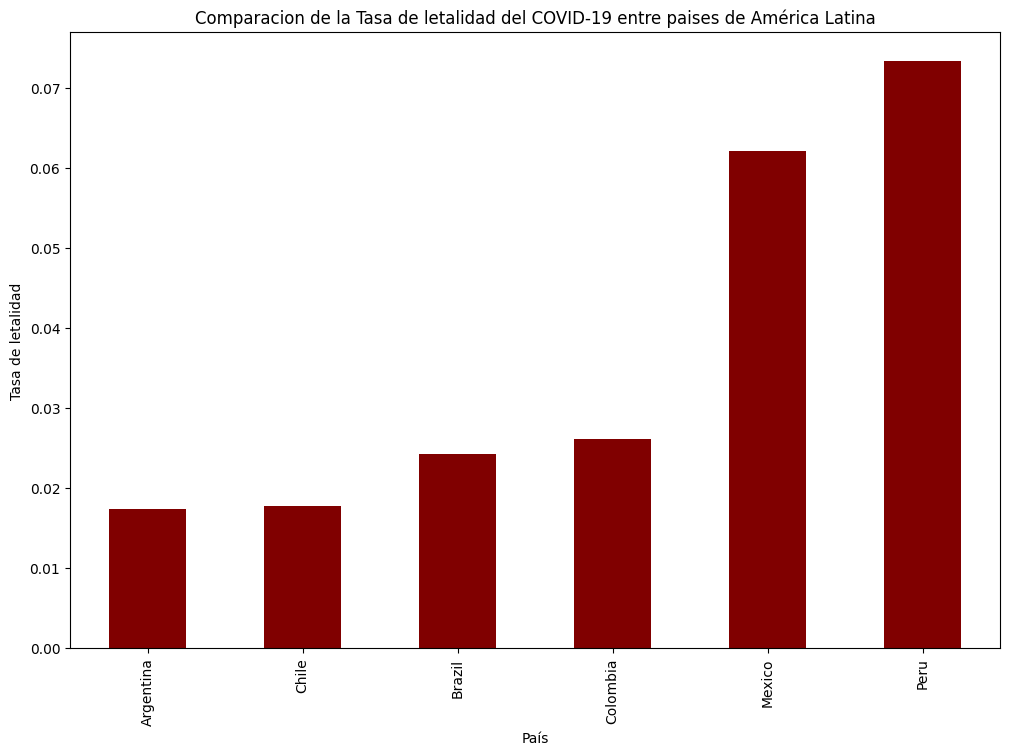

In [135]:
# Calcula la tasa de letalidad por país
data_latinoamerica_paises['case_fatality_rate']=data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
fatality_rates=data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()


# Crea el grafico de barras
plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='maroon')
# Configura los ejes y el título de grafico
plt.xlabel('País')
plt.ylabel('Tasa de letalidad')
plt.title('Comparacion de la Tasa de letalidad del COVID-19 entre paises de América Latina')
plt.show()

Todos los paises han tenido un comportamiento similar en cuanto a la fatalidad, sin embargo apoyandose en otras gráficas se puede observar que ha disminuido.
Los casos nuevos y las muertes nuevas han variado debido a la vacunación y a las medidas tomadas por los paises.

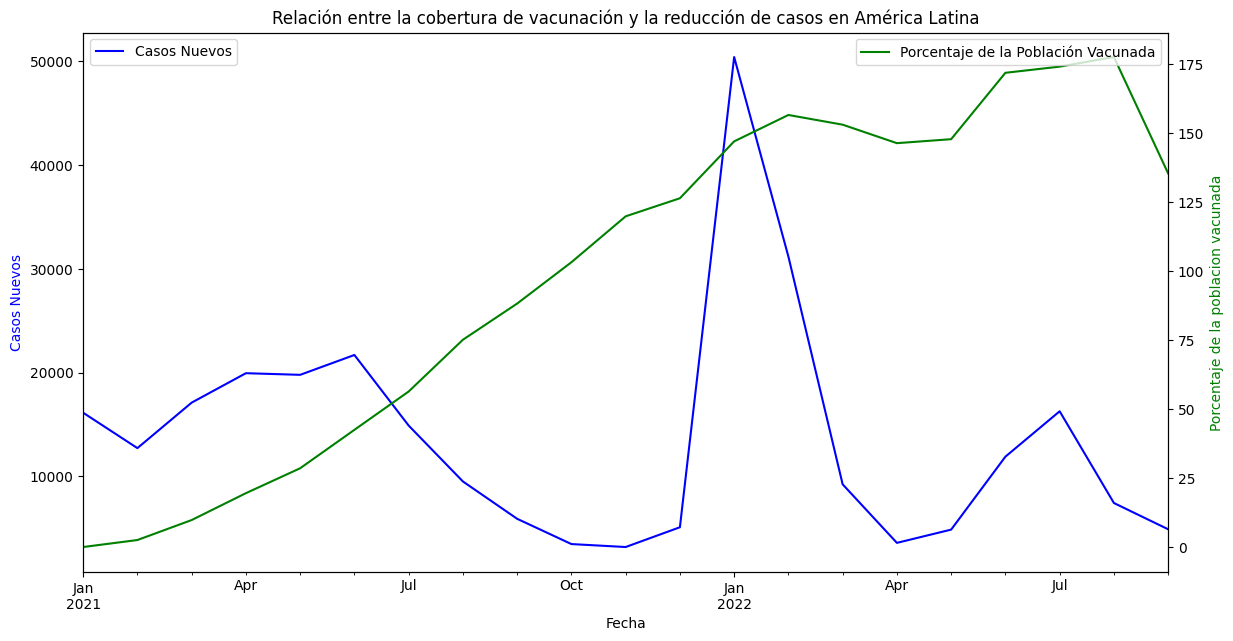

In [139]:
# Como evoluciona la vaucnación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))
ax1=plt.gca()
ax2= ax1.twinx()


#Porcentaje de vacunación
data_latinoamerica_paises['percentage_vaccinated'] = (data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population']) * 100
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la poblacion vacunada', color='green')
ax1.set_title('Relación entre la cobertura de vacunación y la reducción de casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

C:\Users\cesis\AppData\Local\Temp\ipykernel_30796\2979803371.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_latinoamerica_paises, x='date', y='mortality_rate', estimator='mean', ci=None)


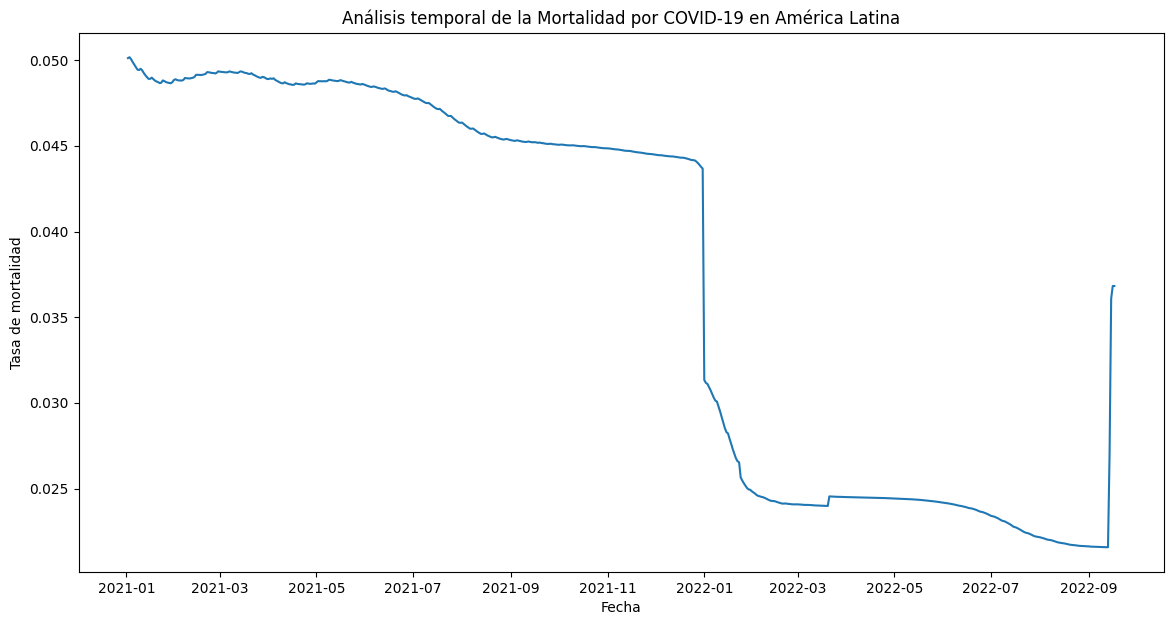

In [140]:
# Evolución de mortalidad
data_latinoamerica_paises['mortality_rate']= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises, x='date', y='mortality_rate', estimator='mean', ci=None)
plt.xlabel('Fecha')
plt.ylabel('Tasa de mortalidad')
plt.title('Análisis temporal de la Mortalidad por COVID-19 en América Latina')
plt.show()

Los casos activos han disminuido y los casos recuperados han aumentado, debido a la vacunacion y a las medidas tomadas por los paises.

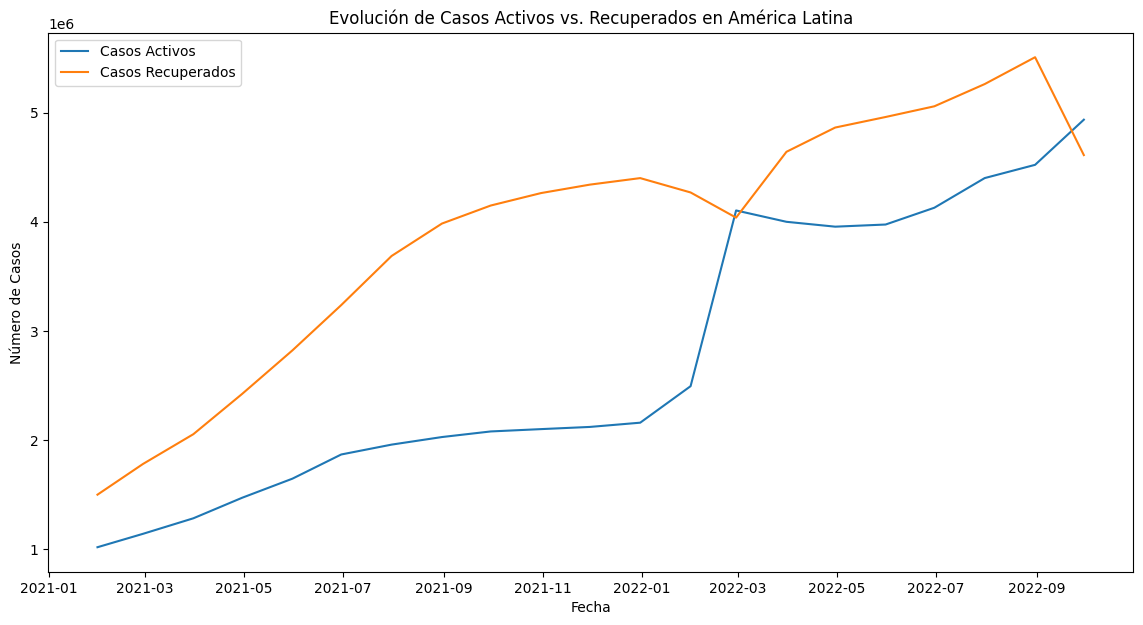

In [141]:
#Evolucion de los casos activos y recuperados en America Latina
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']
plt.figure(figsize=(14, 7))


sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')
plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()


En esta grafica se puede observar que los casos activos disminuyen en ciertos periodos de tiempos, aun asi al final se puede visualizar que van en ascenso. En cuanto a la curva de casos recuperados, al final se observa que va en descenso.

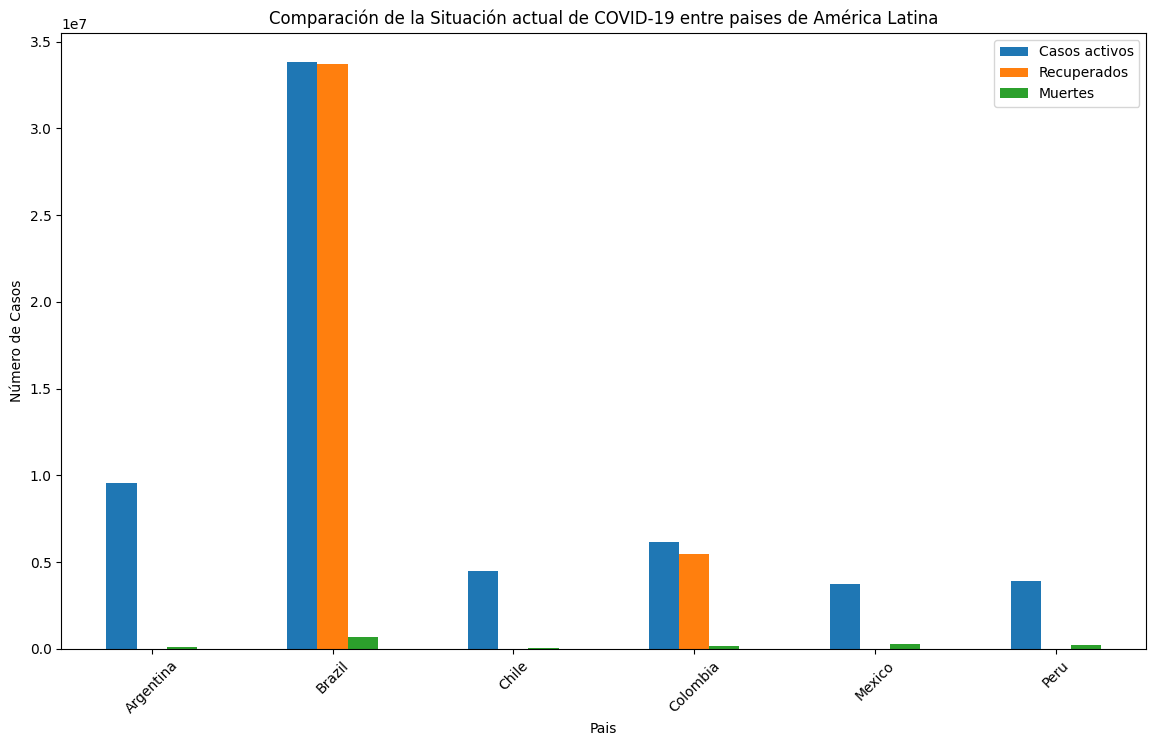

In [142]:
# Comparación de la situación actual del COVID-19 entre los paises de América Latina
current_situation = data_latinoamerica_paises.groupby('country_name').max()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación actual de COVID-19 entre paises de América Latina')
plt.xlabel('Pais')
plt.ylabel('Número de Casos')
plt.legend(['Casos activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

Por lo tanto los paises donde debe expandirse, la empresa farmaceutica "BioGenesis", son Brasil, Mexico y Colombia, ya que son los paises que más casos confirmados y muertes han tenido, además de ser los paises que menos vacunas han adminitrado, tal vez las politicas de vacunación no han sido las mejores o no han tenido la cantidad de vacunas necesarias, esto sin tener en cuenta la densidad de población y la cantidad de habitantes en cada país, problemas sociales, económicos que puedan afectar la cantidad de casos confirmados y muertes. 

WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWW
WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWW

CUARTO AVANCE

Se encuentra en el documento de PowerBI ................................................

                                                PIDA_avance4_SEVILLA_CECILIA.pbix 